# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Описание данных
* airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
* balcony — число балконов
* ceiling_height — высота потолков (м)
* cityCenters_nearest — расстояние до центра города (м)
* days_exposition — сколько дней было размещено объявление (от публикации до снятия)
* first_day_exposition — дата публикации
* floor — этаж
* floors_total — всего этажей в доме
* is_apartment — апартаменты (булев тип)
* kitchen_area — площадь кухни в квадратных метрах (м²)
* last_price — цена на момент снятия с публикации
* living_area — жилая площадь в квадратных метрах (м²)
* locality_name — название населённого пункта
* open_plan — свободная планировка (булев тип)
* parks_around3000 — число парков в радиусе 3 км
* parks_nearest — расстояние до ближайшего парка (м)
* ponds_around3000 — число водоёмов в радиусе 3 км
* ponds_nearest — расстояние до ближайшего водоёма (м)
* rooms — число комнат
* studio — квартира-студия (булев тип)
* total_area — площадь квартиры в квадратных метрах (м²)
* total_images — число фотографий квартиры в объявлении

## Изучение данных из файла

In [528]:
# Загрузим библиотеки

# Загрузим библиотеку pandas для работы с датафреймами
import pandas as pd
# Загрузим библиотеку matplotlib.pyplot для рисования графиков
import matplotlib.pyplot as plt
# будем отображать графики прямо в jupyter'e
%matplotlib inline

# pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None) # подключение опции для отображения датафрейма без скрытия столбцов
# pd.set_option('display.max_colwidth', None)

In [2]:
# Загрузим данные в датафрейм pandas. Учтем, что данные разделены табуляцией. 

df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

df.head()

total_images  last_price  total_area first_day_exposition  rooms  \
0            20  13000000.0       108.0  2019-03-07T00:00:00      3   
1             7   3350000.0        40.4  2018-12-04T00:00:00      1   
2            10   5196000.0        56.0  2015-08-20T00:00:00      2   
3             0  64900000.0       159.0  2015-07-24T00:00:00      3   
4             2  10000000.0       100.0  2018-06-19T00:00:00      2   

   ceiling_height  floors_total  living_area  floor is_apartment  studio  \
0            2.70          16.0         51.0      8          NaN   False   
1             NaN          11.0         18.6      1          NaN   False   
2             NaN           5.0         34.3      4          NaN   False   
3             NaN          14.0          NaN      9          NaN   False   
4            3.03          14.0         32.0     13          NaN   False   

   open_plan  kitchen_area  balcony    locality_name  airports_nearest  \
0      False          25.0      NaN  Санкт-Петербург           18863.0   
1      False          11.0      2.0   посёлок Шушары           12817.0   
2      False           8.3      0.0  Санкт-Петербург           21741.0   
3      False           NaN      0.0  Санкт-Петербург           28098.0   
4      False          41.0      NaN  Санкт-Петербург           31856.0   

   cityCenters_nearest  parks_around3000  parks_nearest  ponds_around3000  \
0              16028.0               1.0          482.0               2.0   
1              18603.0               0.0            NaN               0.0   
2              13933.0               1.0           90.0               2.0   
3               6800.0               2.0           84.0               3.0   
4               8098.0               2.0          112.0               1.0   

   ponds_nearest  days_exposition  
0          755.0              NaN  
1            NaN             81.0  
2          574.0            558.0  
3          234.0            424.0  
4           48.0            121.0

In [3]:
# Посмотрим структуру данных. Названия колонок не противоречат РЕР8

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

In [4]:
df.shape

(23699, 22)

In [5]:
# Найдем явные дубликаты

df.duplicated().sum()

0

In [6]:
df.describe(include=['object', 'bool'])

first_day_exposition is_apartment studio open_plan    locality_name
count                 23699         2775  23699     23699            23650
unique                 1491            2      2         2              364
top     2018-02-01T00:00:00        False  False     False  Санкт-Петербург
freq                    368         2725  23550     23632            15721

### Таблица количества пропусков по столбцам

In [7]:
# Оценим количество пропусков по столбцам. 

df.isna().sum().sort_values(ascending=False)

is_apartment            20924
parks_nearest           15620
ponds_nearest           14589
balcony                 11519
ceiling_height           9195
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
ponds_around3000         5518
days_exposition          3181
kitchen_area             2278
living_area              1903
floors_total               86
locality_name              49
first_day_exposition        0
last_price                  0
total_area                  0
studio                      0
rooms                       0
floor                       0
open_plan                   0
total_images                0
dtype: int64

Видим, что в данных имеется большое количество пропусков. Наибольшое - в столбце is_apartment с булевыми данными.

Исследуем каждый столбец с пропусками в порядке их убывания.

### Таблица значений корреляции Пирсона

In [8]:
# Выведем таблицу значений взаимных корреляций Пирсона для всех параметров очищенного от пропусков датафрейма

df.dropna().corr()

total_images  last_price  total_area     rooms  \
total_images             1.000000    0.030690   -0.045239 -0.025845   
last_price               0.030690    1.000000    0.673532  0.436206   
total_area              -0.045239    0.673532    1.000000  0.780109   
rooms                   -0.025845    0.436206    0.780109  1.000000   
ceiling_height          -0.113687    0.086346   -0.044771 -0.054157   
floors_total             0.093380   -0.128176   -0.216849 -0.271703   
living_area             -0.064231    0.589505    0.927095  0.873361   
floor                    0.031170   -0.034598   -0.084855 -0.157000   
studio                        NaN         NaN         NaN       NaN   
open_plan                     NaN         NaN         NaN       NaN   
kitchen_area             0.010007    0.485420    0.607866  0.318951   
balcony                  0.017652   -0.028120   -0.081545 -0.103584   
airports_nearest         0.058752   -0.018547    0.002965 -0.037016   
cityCenters_nearest     -0.056101   -0.278939   -0.206493 -0.213178   
parks_around3000         0.030974    0.064709    0.123968  0.148749   
parks_nearest           -0.041499    0.055371   -0.034536 -0.108710   
ponds_around3000        -0.084108    0.148967    0.128390  0.157991   
ponds_nearest            0.071493   -0.158641   -0.125408 -0.047045   
days_exposition         -0.112670    0.223818    0.233059  0.210796   

                     ceiling_height  floors_total  living_area     floor  \
total_images              -0.113687      0.093380    -0.064231  0.031170   
last_price                 0.086346     -0.128176     0.589505 -0.034598   
total_area                -0.044771     -0.216849     0.927095 -0.084855   
rooms                     -0.054157     -0.271703     0.873361 -0.157000   
ceiling_height             1.000000     -0.068003    -0.039267 -0.011574   
floors_total              -0.068003      1.000000    -0.267524  0.640009   
living_area               -0.039267     -0.267524     1.000000 -0.127655   
floor                     -0.011574      0.640009    -0.127655  1.000000   
studio                          NaN           NaN          NaN       NaN   
open_plan                       NaN           NaN          NaN       NaN   
kitchen_area               0.013118      0.049442     0.445928  0.113677   
balcony                    0.205197      0.357698    -0.112112  0.347631   
airports_nearest           0.035462      0.015603    -0.034773  0.049358   
cityCenters_nearest       -0.042833     -0.019207    -0.213876 -0.045727   
parks_around3000          -0.024569     -0.241489     0.134312 -0.133321   
parks_nearest             -0.046590      0.089057    -0.080876  0.142021   
ponds_around3000           0.108156     -0.248530     0.161138 -0.095714   
ponds_nearest             -0.110388      0.179848    -0.103450  0.064395   
days_exposition           -0.054561     -0.140145     0.189118  0.007188   

                     studio  open_plan  kitchen_area   balcony  \
total_images            NaN        NaN      0.010007  0.017652   
last_price              NaN        NaN      0.485420 -0.028120   
total_area              NaN        NaN      0.607866 -0.081545   
rooms                   NaN        NaN      0.318951 -0.103584   
ceiling_height          NaN        NaN      0.013118  0.205197   
floors_total            NaN        NaN      0.049442  0.357698   
living_area             NaN        NaN      0.445928 -0.112112   
floor                   NaN        NaN      0.113677  0.347631   
studio                  NaN        NaN           NaN       NaN   
open_plan               NaN        NaN           NaN       NaN   
kitchen_area            NaN        NaN      1.000000  0.006815   
balcony                 NaN        NaN      0.006815  1.000000   
airports_nearest        NaN        NaN      0.040558  0.041000   
cityCenters_nearest     NaN        NaN     -0.221002  0.107197   
parks_around3000        NaN        NaN      0.027414 -0.264814   
parks_nearest          

### Столбец is_apartment (апартаменты)

In [9]:
# Выведем долю заполненных строк в is_apartment относительно всего датафрейма

ratio = df.query('~is_apartment.isnull()').count().max() / df.shape[0]
print(f'Доля заполненных данных составляет: {ratio:.1%}')

Доля заполненных данных составляет: 11.7%


In [10]:
df.is_apartment.value_counts()

False    2725
True       50
Name: is_apartment, dtype: int64

In [11]:
# Доля значений True в is_apartment составляет 1.8%

df.is_apartment.sum() / df.is_apartment.count()

0.018018018018018018

In [12]:
# Введем в датафрейм рассчитанное для каждого наблюдения значение стоимости 1 квадратного метра жилья

df['meter_price'] = (df['last_price'] / df['total_area']).astype('int64')
df['meter_price'].sample(5)

8935     90492
17724    65287
9786     73913
2386     90416
10868    91642
Name: meter_price, dtype: int64

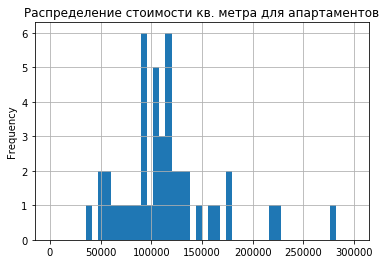

In [13]:
df.query('is_apartment == True')['meter_price'] \
.plot(kind='hist', bins=50, grid=True, range=(0,300000), title='Распределение стоимости кв. метра для апартаментов')

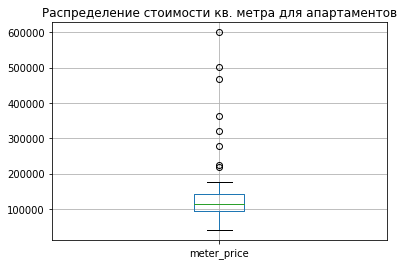

In [14]:
ax = df.query('is_apartment == True')['meter_price'] \
.plot(kind='box', grid=True, title='Распределение стоимости кв. метра для апартаментов')

In [15]:
df.query('is_apartment == True')['meter_price'].describe()

count        50.000000
mean     148353.360000
std      115630.889979
min       40816.000000
25%       93654.000000
50%      113866.500000
75%      143260.000000
max      600000.000000
Name: meter_price, dtype: float64

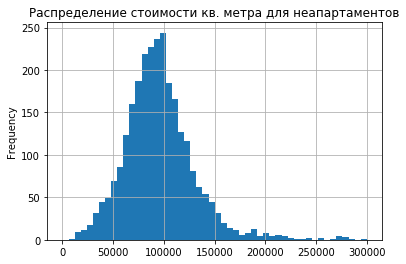

In [16]:
df.query('is_apartment == False')['meter_price'] \
.plot(kind='hist', bins=50, range=(0,300000), grid=True, title='Распределение стоимости кв. метра для неапартаментов')

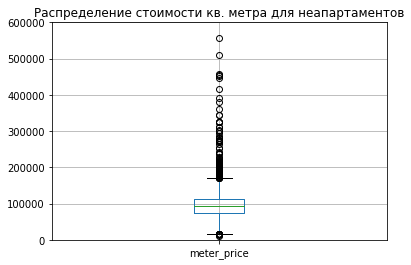

In [17]:
df.query('is_apartment == False')['meter_price'] \
.plot(kind='box', title='Распределение стоимости кв. метра для неапартаментов', ylim=(0,600000), grid=True)

In [18]:
df.query('is_apartment == False')['meter_price'].describe()

count    2.725000e+03
mean     9.852715e+04
std      5.026025e+04
min      1.158700e+04
25%      7.465200e+04
50%      9.333300e+04
75%      1.132080e+05
max      1.000748e+06
Name: meter_price, dtype: float64

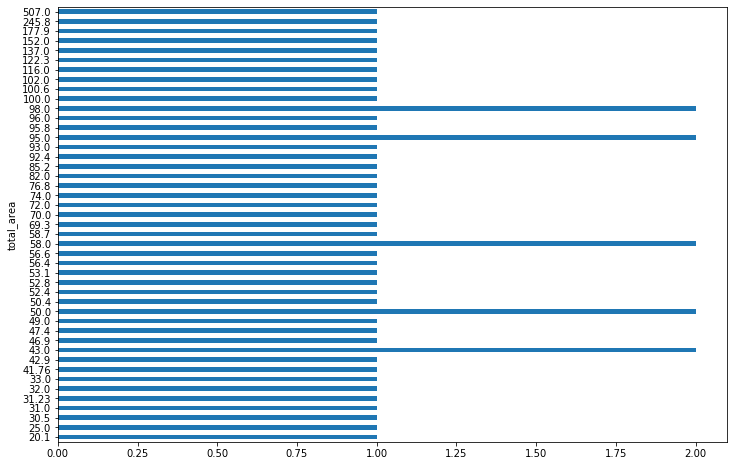

In [19]:
# Распределние значений True столбца is_apartment в зависимости от общей площади. 
# Видим, что апартаменты присутствуют во всем диапазоне общей площади 

df.query('is_apartment == True').groupby('total_area')['is_apartment'].count().plot(kind='barh', figsize=(12,8))

In [20]:
# Теперь сравним столбец is_apartment с studio (квартира-студия (булев тип))

df.query('is_apartment == True and studio == True')['is_apartment'].count()

0

In [21]:
df.query('is_apartment == True and studio == False')['is_apartment'].count()

50

In [22]:
df.query('is_apartment == False and studio == False')['is_apartment'].count()

2710

**Распределение и средняя цена апартаментов практически не отличаются от жилой недвижимости. Пустые значения для столбца is_apartment можно взять в соответствии с столбцом studio: там где studio = True, is_apartment будет True. Как мы видим, они полностью совпадают. Пропуски в is_apartment, соответствующию значениям False в studio, заполним False, ведь ошибка тогда составит $1 - 2710/2725 = 0.5%$**

### Столбцы parks_nearest (расстояние до ближайшего парка (м)) и parks_around3000 (число парков в радиусе 3 км)

In [23]:
# Выведем долю заполненных строк в parks_nearest относительно всего датафрейма 

ratio = df.query('~parks_nearest.isnull()').count().max() / df.shape[0]
print(f'Доля заполненных данных составляет: {ratio:.1%}')

Доля заполненных данных составляет: 34.1%


In [24]:
# Посмотрим на примеры значений заполненных данных в parks_nearest

df.query('~parks_nearest.isnull()')['parks_nearest'].sample(5)

22203     84.0
2435     658.0
16051    843.0
4905     309.0
16332    104.0
Name: parks_nearest, dtype: float64

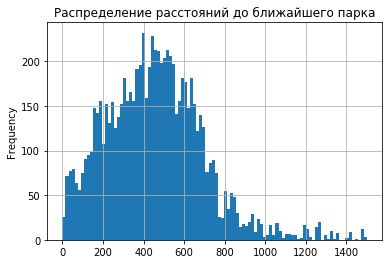

In [25]:
df['parks_nearest'].plot(kind='hist', range=(0,1500), bins=100, grid=True, title='Распределение расстояний до ближайшего парка')

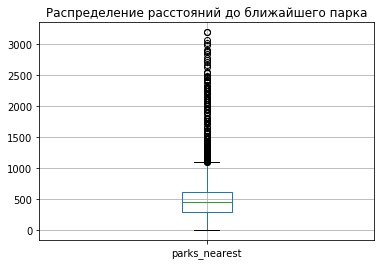

In [26]:
df['parks_nearest'].plot(kind='box', grid=True, title='Распределение расстояний до ближайшего парка')

In [27]:
df['parks_nearest'].describe()

count    8079.000000
mean      490.804555
std       342.317995
min         1.000000
25%       288.000000
50%       455.000000
75%       612.000000
max      3190.000000
Name: parks_nearest, dtype: float64

Нужно найти зависимость значений в parks_nearest от других параметров, например числа парков в радиусе 3 км, и заполнить пропуски.

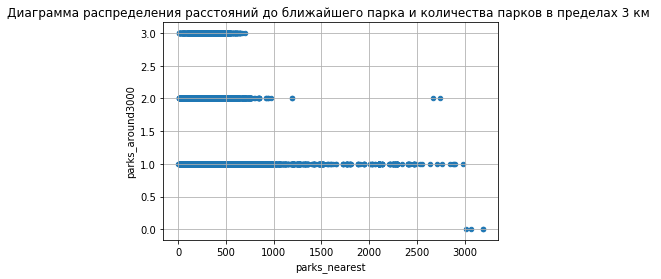

In [28]:
df.plot(kind='scatter', x='parks_nearest', y='parks_around3000', grid=True, \
        title='Диаграмма распределения расстояний до ближайшего парка и количества парков в пределах 3 км ')

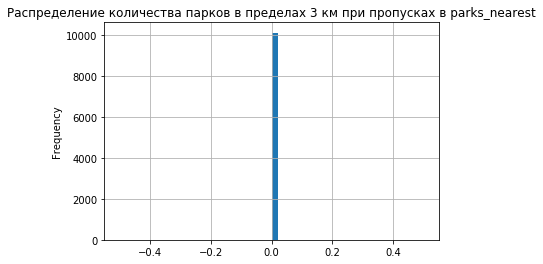

In [29]:
df.query('parks_nearest.isna()')['parks_around3000'].plot(kind='hist', bins=50, grid=True, \
                            title='Распределение количества парков в пределах 3 км при пропусках в parks_nearest')

In [30]:
df.query('parks_nearest.isna()')['parks_around3000'].unique()

array([ 0., nan])

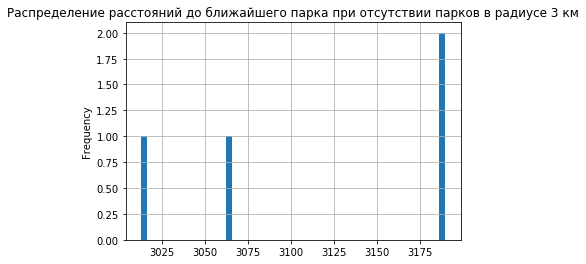

In [31]:
df.query('parks_around3000 == 0')['parks_nearest'].plot(kind='hist', bins=50, grid=True, \
                            title='Распределение расстояний до ближайшего парка при отсутствии парков в радиусе 3 км')

In [32]:
df.query('parks_around3000 == 0')['parks_nearest'].unique()

array([  nan, 3064., 3190., 3013.])

In [33]:
df.query('parks_around3000 == 0')['parks_nearest'].count()

4

In [34]:
df.query('parks_around3000.isna()')['parks_nearest'].unique()

array([nan])

**Видим, что там, где пропуск в столбце parks_neares, в столбце parks_around3000 - 0 или пропуск. А там где в столбце parks_around3000 - 0, в столбце parks_nearest - пропуск или три значения: 3064, 3190, 3013. Отсюда следует, что пропуски в parks_around3000 можно заменить на 0, там где есть пропуски в parks_nearest. В свою очередь пропуски в parks_nearest можно заменить на значение 3001 для 0 в parks_nearest, что соответсвует логике заполнения: там, где значения parks_nearest большее 3000, значения parks_around3000 равны 0. Формат следует перевести в int64, чтобы округлить до целых.**

### Столбцы ponds_nearest (расстояние до ближайшего парка (м)) и ponds_around3000 (число прудов в радиусе 3 км)

In [35]:
# Выведем долю заполненных строк в ponds_nearest относительно всего датафрейма 

ratio = df.query('~ponds_nearest.isnull()').count().max() / df.shape[0]
print(f'Доля заполненных данных составляет: {ratio:.1%}')

Доля заполненных данных составляет: 38.4%


In [36]:
# Посмотрим на примеры значений заполненных данных в ponds_nearest

df.query('~ponds_nearest.isnull()')['ponds_nearest'].sample(5)

10469    716.0
21535    465.0
4926     812.0
22191    936.0
14188    990.0
Name: ponds_nearest, dtype: float64

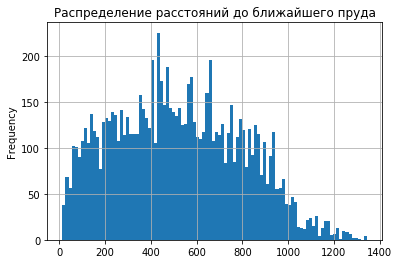

In [37]:
df['ponds_nearest'].plot(kind='hist', bins=100, grid=True, title='Распределение расстояний до ближайшего пруда')

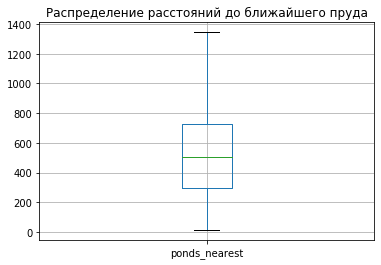

In [38]:
df['ponds_nearest'].plot(kind='box', grid=True, title='Распределение расстояний до ближайшего пруда')

In [39]:
df['ponds_nearest'].describe()

count    9110.000000
mean      517.980900
std       277.720643
min        13.000000
25%       294.000000
50%       502.000000
75%       729.000000
max      1344.000000
Name: ponds_nearest, dtype: float64

Нужно найти зависимость значений в ponds_nearest от других параметров, например числа прудов в радиусе 3 км, и заполнить пропуски.

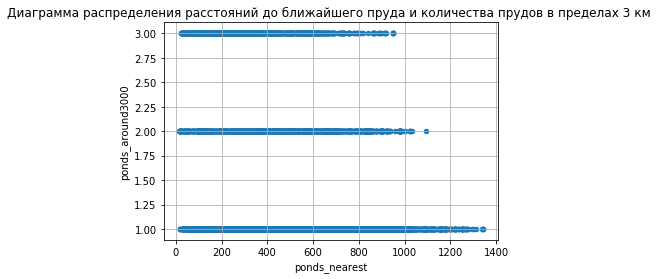

In [40]:
df.plot(kind='scatter', x='ponds_nearest', y='ponds_around3000', grid=True, \
        title='Диаграмма распределения расстояний до ближайшего пруда и количества прудов в пределах 3 км ')

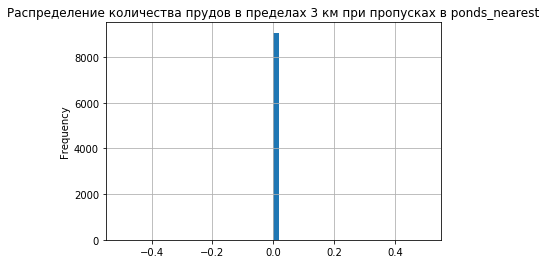

In [41]:
df.query('ponds_nearest.isna()')['ponds_around3000'].plot(kind='hist', bins=50, grid=True, \
                            title='Распределение количества прудов в пределах 3 км при пропусках в ponds_nearest')

In [42]:
df.query('ponds_nearest.isna()')['ponds_around3000'].unique()

array([ 0., nan])

In [43]:
df.query('ponds_nearest.isna() and ponds_around3000 == 0').ponds_around3000.count()

9071

In [44]:
df.query('ponds_nearest.isna() and ponds_around3000 != 0').ponds_around3000.count()

0

In [45]:
df.query('ponds_around3000 == 0')['ponds_nearest'].unique()

array([nan])

In [46]:
df.query('ponds_around3000.isna()')['ponds_nearest'].unique()

array([nan])

**Видим, что все пропуски в ponds_nearest соответсвуют значению 0 либо пропускам в ponds_around3000. Поэтому все пропуски в ponds_around3000 следует заменить на 0 в соответсвии с пропусками в ponds_nearest. А пропуски в ponds_nearest, что соответствуют 0 в ponds_around3000, заменить на значение 3001. Это соотвествует логике присвоенных значений и в дальнейшем позволит нам разбить данные на категории. Формат следует перевести в int64, чтобы округлить до целых.**

### Столбец balcony (число балконов)

In [47]:
# Выведем долю заполненных строк в balcony относительно всего датафрейма 

ratio = df.query('~balcony.isnull()').count().max() / df.shape[0]
print(f'Доля заполненных данных составляет: {ratio:.1%}')

Доля заполненных данных составляет: 51.4%


In [48]:
# Посмотрим на примеры значений заполненных данных в balcony

df.query('~balcony.isnull()')['balcony'].sample(5)

8606     2.0
1839     1.0
22011    0.0
18067    0.0
23685    1.0
Name: balcony, dtype: float64

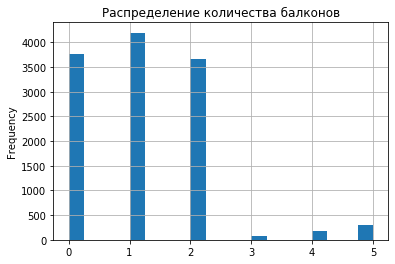

In [49]:
df['balcony'].plot(kind='hist', bins=20, grid=True, title='Распределение количества балконов')

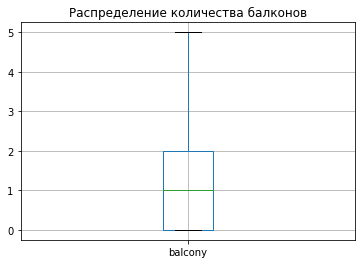

In [50]:
df['balcony'].plot(kind='box', grid=True, title='Распределение количества балконов')

In [51]:
df['balcony'].describe()

count    12180.000000
mean         1.150082
std          1.071300
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max          5.000000
Name: balcony, dtype: float64

Нужно найти зависимость значений в balcony от других параметров и заполнить пропуски. По таблице корреляций Пирсона видим, что наиболшее значение с floor и floors_total, отвечающие за этажность.

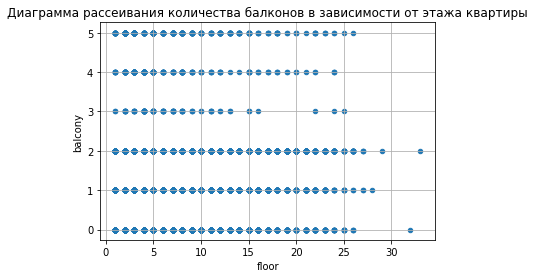

In [52]:
df.query('~balcony.isna()').plot(x='floor', y='balcony', kind='scatter', grid=True, \
                                 title='Диаграмма рассеивания количества балконов в зависимости от этажа квартиры')

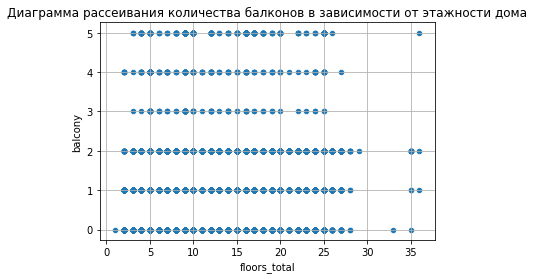

In [53]:
df.query('~balcony.isna()').plot(x='floors_total', y='balcony', kind='scatter', grid=True, \
                                 title='Диаграмма рассеивания количества балконов в зависимости от этажности дома')

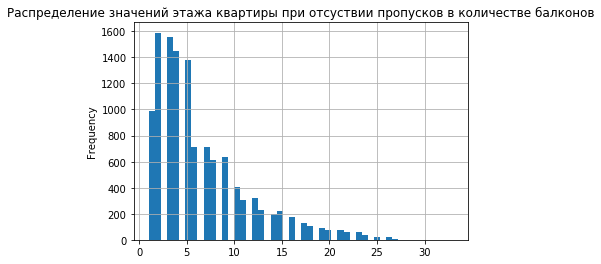

In [54]:
df.query('~balcony.isna()')['floor'].plot(kind='hist', bins=50, grid=True, \
                                 title='Распределение значений этажа квартиры при отсуствии пропусков в количестве балконов')

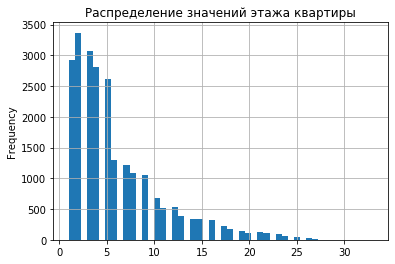

In [55]:
df['floor'].plot(kind='hist', bins=50, grid=True, \
                                 title='Распределение значений этажа квартиры')

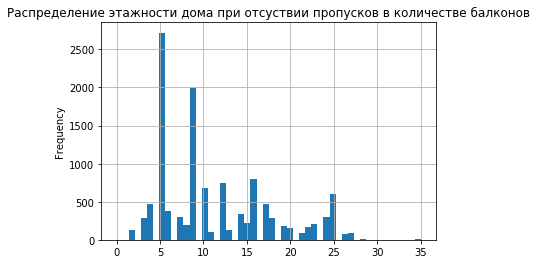

In [56]:
df.query('~balcony.isna()')['floors_total'].plot(kind='hist', bins=50, range=(0,35), grid=True, \
                                 title='Распределение этажности дома при отсуствии пропусков в количестве балконов')

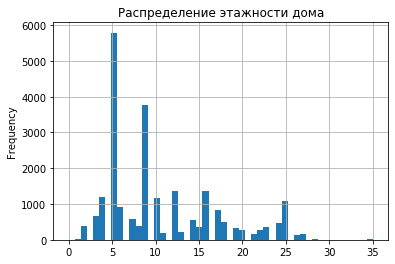

In [57]:
df['floors_total'].plot(kind='hist', bins=50, range=(0,35), grid=True, \
                                 title='Распределение этажности дома')

In [58]:
# Таблица рассеивания количества балконов в зависимости от этажа квартиры

pd.crosstab(df['floor'], df['balcony'], margins=True)

balcony   0.0   1.0   2.0  3.0  4.0  5.0    All
floor                                          
1         604   131   232    2    7   15    991
2         597   605   325    7   18   37   1589
3         500   626   365    6   28   32   1557
4         444   594   352   16   26   16   1448
5         411   569   342   11   21   29   1383
6         172   236   268    7   10   19    712
7         188   242   241    7    9   23    710
8         132   216   222    6   15   21    612
9         165   213   236    3    7   15    639
10         84   136   167    2    5   11    405
11         61    88   142    4    4    8    307
12         76    97   125    2    5   14    319
13         54    77    84    2    1   12    230
14         41    63    82    0    1    9    196
15         42    69    90    2    7   10    220
16         37    51    81    1    3    4    177
17         29    42    48    0    3    4    126
18         21    24    49    0    3    7    104
19         22    24    41    0    2    2     91
20         13    16    40    0    2    3     74
21         16    21    36    0    1    1     75
22         15    20    20    1    2    5     63
23         15    18    24    0    0    3     60
24          8     6    20    1    3    2     40
25          7     6    10    1    0    1     25
26          3     2    12    0    0    1     18
27          0     2     3    0    0    0      5
28          0     1     0    0    0    0      1
29          0     0     1    0    0    0      1
32          1     0     0    0    0    0      1
33          0     0     1    0    0    0      1
All      3758  4195  3659   81  183  304  12180

In [59]:
# Выведем медианные значения количества балконов для каждого этажа, чтобы заполнить ими соответсвующие пропуски в столбце balcony

df.groupby('floor')['balcony'].median().head(10)

floor
1     0.0
2     1.0
3     1.0
4     1.0
5     1.0
6     1.0
7     1.0
8     1.0
9     1.0
10    1.0
Name: balcony, dtype: float64

**Итак, пропуски в столбце balcony можно заполнять медианами по группам согласно этажу квартиры в столбце floor. Также можно предположить, что пропуски получились вследствие отсутствия балконов в таких квартирах, поэтому их логичнее будет заменить на нулевые значения. Формат данных следует перевести в целочисленный.**

### Столбец ceiling_height (высота потолков)

In [60]:
# Выведем долю заполненных строк в ceiling_height относительно всего датафрейма 

ratio = df.query('~ceiling_height.isnull()').count().max() / df.shape[0]
print(f'Доля заполненных данных составляет: {ratio:.1%}')

Доля заполненных данных составляет: 61.2%


In [61]:
# Посмотрим на значения данных в ceiling_height

df['ceiling_height'].unique()

array([  2.7 ,    nan,   3.03,   2.5 ,   2.67,   2.56,   3.05,   2.75,
         2.6 ,   2.9 ,   2.8 ,   2.55,   3.  ,   2.65,   3.2 ,   2.61,
         3.25,   3.45,   2.77,   2.85,   2.64,   2.57,   4.15,   3.5 ,
         3.3 ,   2.71,   4.  ,   2.47,   2.73,   2.84,   3.1 ,   2.34,
         3.4 ,   3.06,   2.72,   2.54,   2.51,   2.78,   2.76,  25.  ,
         2.58,   3.7 ,   2.52,   5.2 ,   2.87,   2.66,   2.59,   2.  ,
         2.45,   3.6 ,   2.92,   3.11,   3.13,   3.8 ,   3.15,   3.55,
         3.16,   3.62,   3.12,   2.53,   2.74,   2.96,   2.46,   5.3 ,
         5.  ,   2.79,   2.95,   4.06,   2.94,   3.82,   3.54,   3.53,
         2.83,   4.7 ,   2.4 ,   3.38,   3.01,   5.6 ,   3.65,   3.9 ,
         3.18,   3.35,   2.3 ,   3.57,   2.48,   2.62,   2.82,   3.98,
         2.63,   3.83,   3.52,   3.95,   3.75,   2.88,   3.67,   3.87,
         3.66,   3.85,   3.86,   4.19,   3.24,   4.8 ,   4.5 ,   4.2 ,
         3.36,  32.  ,   3.08,   3.68,   3.07,   3.37,   3.09,   8.  ,
      

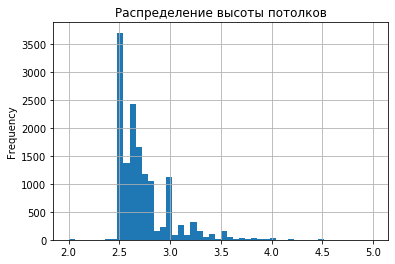

In [62]:
df['ceiling_height'].plot(kind='hist', bins=50, grid=True, title='Распределение высоты потолков', range=(2,5))

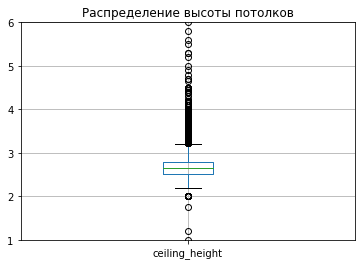

In [63]:
df['ceiling_height'].plot(kind='box', grid=True, title='Распределение высоты потолков', ylim=(1,6))

In [64]:
df['ceiling_height'].describe()

count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

Видим, что в данных много выбросов, об этом говорят максимальное значение, 100 м, и минимальное, 1 м. Их нужно будет отсечь. Для заполнения пропусков нужно найти зависимость значений в ceiling_height от других параметров. Слабая корреляция есть только с floor и floors_total.

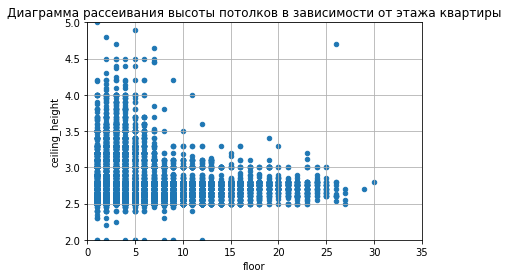

In [65]:
df.plot(x='floor', y='ceiling_height', kind='scatter', ylim=(2,5), xlim=(0,35), grid=True, \
                                 title='Диаграмма рассеивания высоты потолков в зависимости от этажа квартиры')

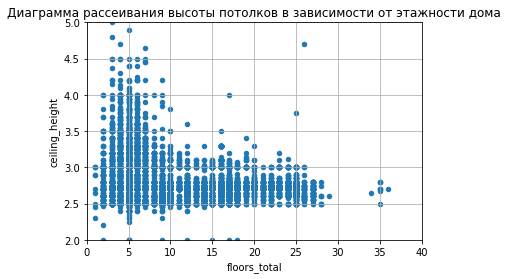

In [66]:
df.plot(x='floors_total', y='ceiling_height', kind='scatter', ylim=(2,5), xlim=(0,40), grid=True, \
                                 title='Диаграмма рассеивания высоты потолков в зависимости от этажности дома')

**Так же как и в случае со столбцом balcony пропуски в ceiling_height можно заполнить медианами по группам согласно этажу квартиры в столбце floor. Пока оставим без изменений. Значения больше 20 разделим на 10, т.к. такие большие значения связаны с ошибками ввода. Формат данных оставляем float64.** 

### Столбец airports_nearest (расстояние до ближайшего аэропорта (м))

In [67]:
# Выведем долю заполненных строк в parks_nearest относительно всего датафрейма 

ratio = df.query('~airports_nearest.isnull()').count().max() / df.shape[0]
print(f'Доля заполненных данных составляет: {ratio:.1%}')

Доля заполненных данных составляет: 76.6%


In [68]:
# Посмотрим на примеры значений заполненных данных в ceiling_height

df.query('~airports_nearest.isnull()')['airports_nearest'].sample(5)

22982    36326.0
12711    43431.0
10877    19180.0
8171     10819.0
17688    28344.0
Name: airports_nearest, dtype: float64

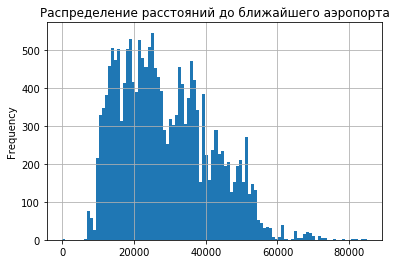

In [69]:
df['airports_nearest'].plot(kind='hist', bins=100, title='Распределение расстояний до ближайшего аэропорта', grid=True)

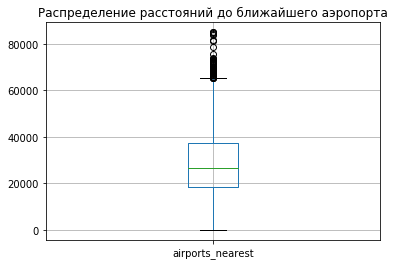

In [70]:
df['airports_nearest'].plot(kind='box', title='Распределение расстояний до ближайшего аэропорта', grid=True)

In [71]:
df['airports_nearest'].describe()

count    18157.000000
mean     28793.672193
std      12630.880622
min          0.000000
25%      18585.000000
50%      26726.000000
75%      37273.000000
max      84869.000000
Name: airports_nearest, dtype: float64

Для заполнения пропусков нужно найти зависимость значений в airports_nearest от других параметров. Средння корреляция есть с cityCenters_nearest - расстоянием до цента, что вполне логично.

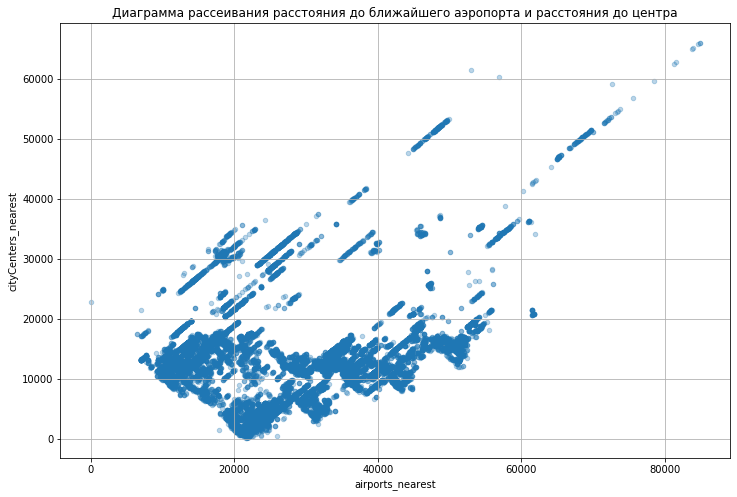

In [72]:
df.plot(x='airports_nearest', y='cityCenters_nearest', kind='scatter', figsize=(12,8), grid=True, alpha=0.3, \
title='Диаграмма рассеивания расстояния до ближайшего аэропорта и расстояния до центра')

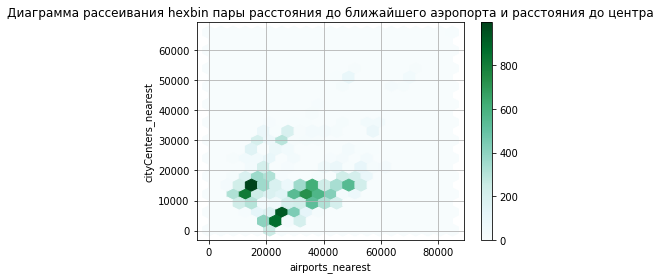

In [73]:
df.plot(x='airports_nearest', y='cityCenters_nearest', kind='hexbin', gridsize=20, grid=True, sharex=False, \
title='Диаграмма рассеивания hexbin пары расстояния до ближайшего аэропорта и расстояния до центра')

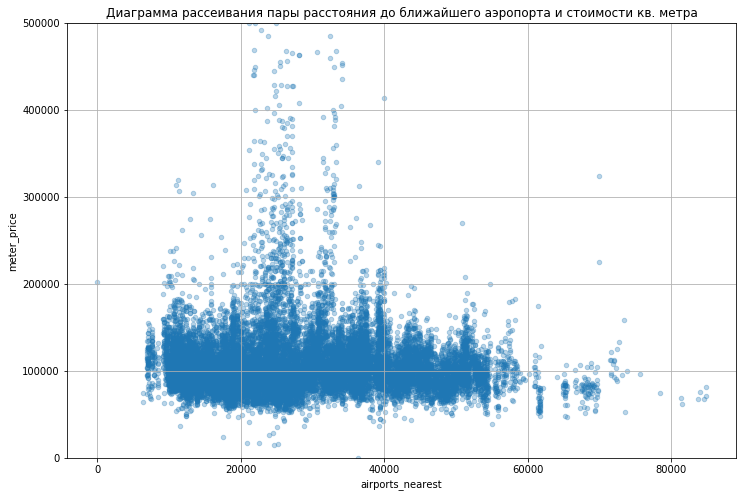

In [74]:
df.plot(x='airports_nearest', y='meter_price', kind='scatter', figsize=(12,8), grid=True, alpha=0.3, ylim=(0,500000),\
title='Диаграмма рассеивания пары расстояния до ближайшего аэропорта и стоимости кв. метра')

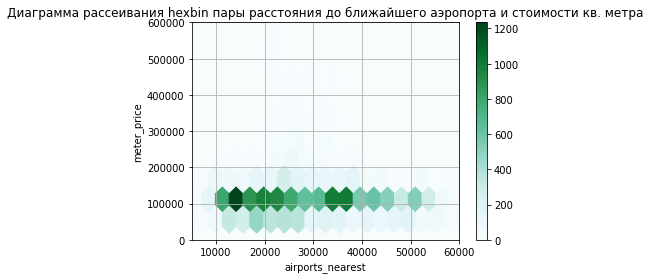

In [75]:
df.plot(x='airports_nearest', y='meter_price', kind='hexbin', gridsize=30, grid=True, ylim=(0,600000), xlim=(5000,60000),\
sharex=False, title='Диаграмма рассеивания hexbin пары расстояния до ближайшего аэропорта и стоимости кв. метра')

Видим, что основные значения распределяются следующим образом: 

при cityCenters_nearest = 15000, 5000, 12000 - соответственно airports_nearest = 17000, 23000, 35000

In [76]:
df.query('airports_nearest.isna() and cityCenters_nearest.isna()').ponds_around3000.count()

0

In [77]:
df.query('~airports_nearest.isna() and cityCenters_nearest.isna()').ponds_around3000.count()

1

In [78]:
df.query('airports_nearest.isna() and ~cityCenters_nearest.isna()').ponds_around3000.count()

24

**Видим, что пропуски в двух столбцах airports_nearest и cityCenters_nearest практически совпадают, и так как они коррелировали между собой и других высоких корреляций нет, кроме стоимости, наилучшим решением будет от них избавиться путем удаления или оставить без изменения ввиду того, что эти параметры серьезно влияют на стоимость жилья. Формат поэтому оставляем float64**

### Столбец cityCenters_nearest (расстояние до центра (м))

In [79]:
# Выведем долю заполненных строк в cityCenters_nearest относительно всего датафрейма 

ratio = df.query('~cityCenters_nearest.isnull()').count().max() / df.shape[0]
print(f'Доля заполненных данных составляет: {ratio:.1%}')

Доля заполненных данных составляет: 76.7%


In [80]:
# Посмотрим на примеры значений заполненных данных в cityCenters_nearest

df.query('~cityCenters_nearest.isnull()')['cityCenters_nearest'].sample(5)

5980     13537.0
18254    31510.0
21656    13114.0
16059    15441.0
9350     12995.0
Name: cityCenters_nearest, dtype: float64

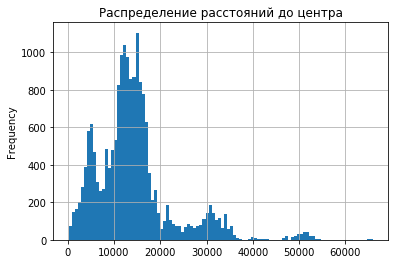

In [81]:
df['cityCenters_nearest'].plot(kind='hist', bins=100, title='Распределение расстояний до центра', grid=True)

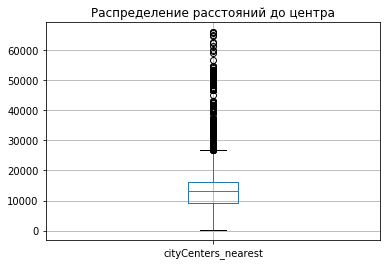

In [82]:
df['cityCenters_nearest'].plot(kind='box', title='Распределение расстояний до центра', grid=True)

In [83]:
df['cityCenters_nearest'].describe()

count    18180.000000
mean     14191.277833
std       8608.386210
min        181.000000
25%       9238.000000
50%      13098.500000
75%      16293.000000
max      65968.000000
Name: cityCenters_nearest, dtype: float64

In [84]:
# В завершении переименуем столбец согласно рекомендациям

df = df.rename(columns=({'cityCenters_nearest': 'citycenters_nearest'}))
df.head()

total_images  last_price  total_area first_day_exposition  rooms  \
0            20  13000000.0       108.0  2019-03-07T00:00:00      3   
1             7   3350000.0        40.4  2018-12-04T00:00:00      1   
2            10   5196000.0        56.0  2015-08-20T00:00:00      2   
3             0  64900000.0       159.0  2015-07-24T00:00:00      3   
4             2  10000000.0       100.0  2018-06-19T00:00:00      2   

   ceiling_height  floors_total  living_area  floor is_apartment  studio  \
0            2.70          16.0         51.0      8          NaN   False   
1             NaN          11.0         18.6      1          NaN   False   
2             NaN           5.0         34.3      4          NaN   False   
3             NaN          14.0          NaN      9          NaN   False   
4            3.03          14.0         32.0     13          NaN   False   

   open_plan  kitchen_area  balcony    locality_name  airports_nearest  \
0      False          25.0      NaN  Санкт-Петербург           18863.0   
1      False          11.0      2.0   посёлок Шушары           12817.0   
2      False           8.3      0.0  Санкт-Петербург           21741.0   
3      False           NaN      0.0  Санкт-Петербург           28098.0   
4      False          41.0      NaN  Санкт-Петербург           31856.0   

   citycenters_nearest  parks_around3000  parks_nearest  ponds_around3000  \
0              16028.0               1.0          482.0               2.0   
1              18603.0               0.0            NaN               0.0   
2              13933.0               1.0           90.0               2.0   
3               6800.0               2.0           84.0               3.0   
4               8098.0               2.0          112.0               1.0   

   ponds_nearest  days_exposition  meter_price  
0          755.0              NaN       120370  
1            NaN             81.0        82920  
2          574.0            558.0        92785  
3          234.0            424.0       408176  
4           48.0            121.0       100000

**Обращаем внимание на два пика на гистаграмме распределения. Это скорее всего связано с неравномерностью застройки жилья - исторически сложилось, что крупные российские города опоясывают промышленные зоны, а жилые новостройки в основном возникают ближе к окраине города и за его чертой.** 

**От пропусков в двух столбцах airports_nearest и citycenters_nearest можно избавиться путем удаления ввиду того, что эти параметры серьезно влияют на стоимость жилья и других хорошо коррелирующих с ними параметров нет.** 

### Столбец days_exposition (сколько дней было размещено объявление (от публикации до снятия))

In [85]:
# Выведем долю заполненных строк в days_exposition относительно всего датафрейма 

ratio = df.query('~days_exposition.isnull()').count().max() / df.shape[0]
print(f'Доля заполненных данных составляет: {ratio:.1%}')

Доля заполненных данных составляет: 86.6%


In [86]:
# Посмотрим на примеры значений заполненных данных в days_exposition

df.query('~days_exposition.isnull()')['days_exposition'].sample(5)

4686     140.0
16386    121.0
20843     37.0
735       30.0
3622      78.0
Name: days_exposition, dtype: float64

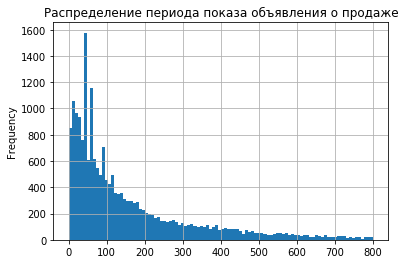

In [87]:
df['days_exposition'].plot(kind='hist', bins=100, \
                           title='Распределение периода показа объявления о продаже', range=(0,800), grid=True)

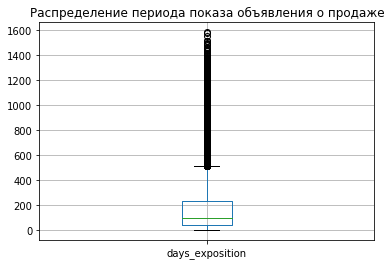

In [88]:
df['days_exposition'].plot(kind='box', title='Распределение периода показа объявления о продаже', grid=True)

In [89]:
df['days_exposition'].describe()

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

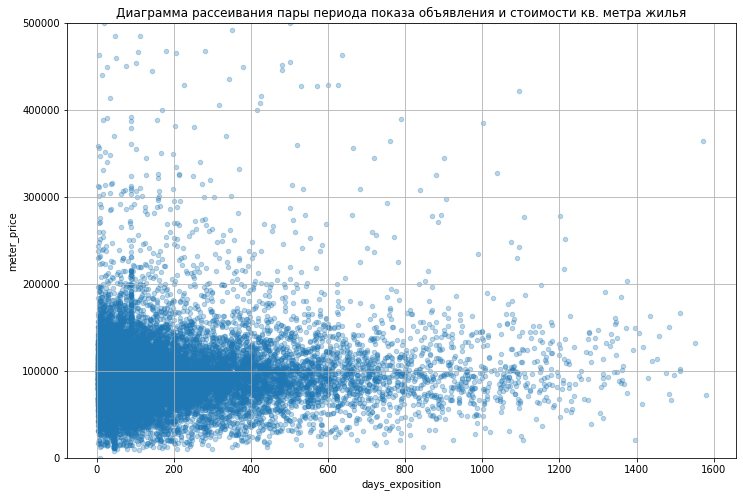

In [90]:
df.plot(x='days_exposition', y='meter_price', kind='scatter', figsize=(12,8), grid=True, alpha=0.3, ylim=(0,500000),\
title='Диаграмма рассеивания пары периода показа объявления и стоимости кв. метра жилья')

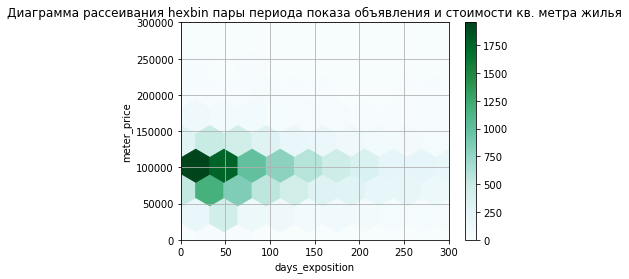

In [91]:
df.plot(x='days_exposition', y='meter_price', kind='hexbin', gridsize=50, grid=True, xlim=(0,300), ylim=(0,300000), \
sharex=False, title='Диаграмма рассеивания hexbin пары периода показа объявления и стоимости кв. метра жилья')

**Видим распределение Пуассона. Имеется слабая положительная корреляция со стоимостью и площадью жилья - чем дороже квартира, тем как правило труднее ее продать.**

**От пропусков в этом столбце можно избавляться путем внесения медианного значения 95 дней, или оставить как есть. Формат тогда остается.**

### Столбец kitchen_area (площадь кухни (м²))

In [92]:
# Выведем долю заполненных строк в kitchen_area относительно всего датафрейма 

ratio = df.query('~kitchen_area.isnull()').count().max() / df.shape[0]
print(f'Доля заполненных данных составляет: {ratio:.1%}')

Доля заполненных данных составляет: 90.4%


In [93]:
# Посмотрим на примеры значений заполненных данных в kitchen_area

df.query('~kitchen_area.isnull()')['kitchen_area'].sample(5)

17229     9.3
4871      6.0
12442     5.3
13950     8.9
15578    26.9
Name: kitchen_area, dtype: float64

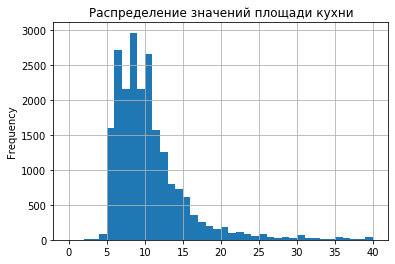

In [94]:
df['kitchen_area'].plot(kind='hist', bins=40, title='Распределение значений площади кухни', range=(0,40), grid=True)

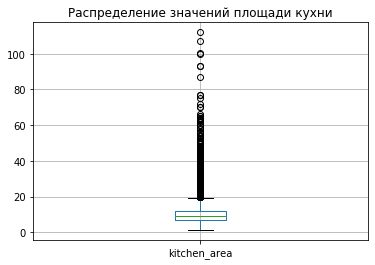

In [95]:
df['kitchen_area'].plot(kind='box', title='Распределение значений площади кухни', grid=True)

In [96]:
df['kitchen_area'].describe()

count    21421.000000
mean        10.569807
std          5.905438
min          1.300000
25%          7.000000
50%          9.100000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64

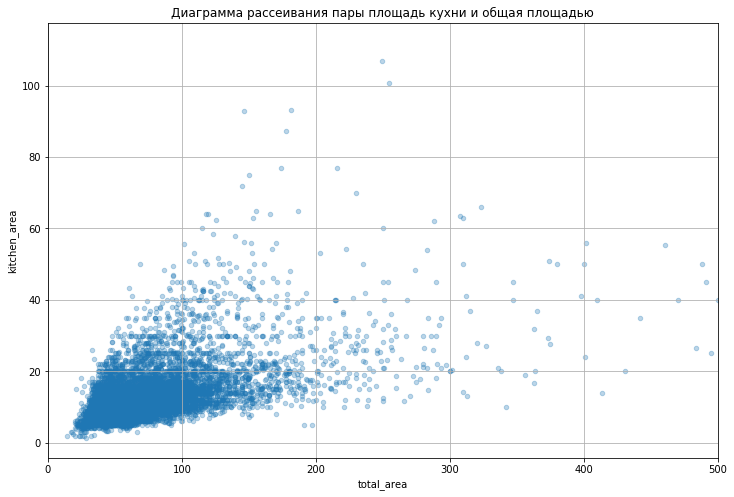

In [97]:
# Умеренная корреляция с общей площадью 

df.plot(x='total_area', y='kitchen_area', kind='scatter', \
                                        figsize=(12,8), grid=True, alpha=0.3, xlim=(0,500),\
                                        title='Диаграмма рассеивания пары площадь кухни и общая площадью')

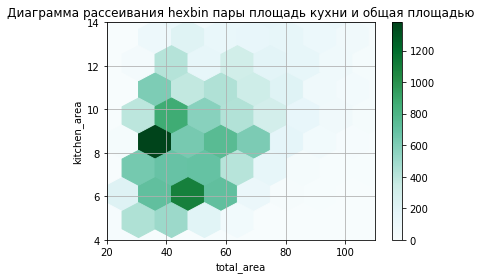

In [98]:
df.plot(x='total_area', y='kitchen_area', kind='hexbin', \
                               gridsize=80, grid=True, ylim=(4,14), xlim=(20,110), sharex=False, \
                               title='Диаграмма рассеивания hexbin пары площадь кухни и общая площадью')

In [99]:
# Исследуем зависимость kitchen_area от studio

df.query('~kitchen_area.isna()').studio.unique()

array([False])

In [100]:
df.query('kitchen_area.isna()').studio.unique()

array([False,  True])

In [101]:
df.query('~kitchen_area.isna()').studio.count()

21421

In [102]:
df.query('studio == False').kitchen_area.count()

21421

In [103]:
df.query('studio == True').kitchen_area.unique()

array([nan])

In [104]:
df.query('studio == True').kitchen_area.count()

0

In [105]:
df.query('studio == True')[['kitchen_area', 'studio', 'open_plan']].head()

kitchen_area  studio  open_plan
144           NaN    True      False
440           NaN    True      False
608           NaN    True      False
697           NaN    True      False
716           NaN    True      False

In [106]:
df.query('open_plan == True').count()

total_images            67
last_price              67
total_area              67
first_day_exposition    67
rooms                   67
ceiling_height          15
floors_total            67
living_area             62
floor                   67
is_apartment             7
studio                  67
open_plan               67
kitchen_area             0
balcony                 54
locality_name           67
airports_nearest        37
citycenters_nearest     37
parks_around3000        37
parks_nearest           11
ponds_around3000        37
ponds_nearest           24
days_exposition         67
meter_price             67
dtype: int64

**Видим, что если нет пропуска в kitchen_area, то studio принимает значения False. А если studio - True, то в kitchen_area - пропуск. Это соответсвует логике, что если выделяется кухня, то это не соответсвует квартире-студии. Также видим, что при наличии свободной планировки площадь кухни не указана. Поэтому, пропуски в kitchen_area можно заменить на 0 в соответствии с True в studio и True в open_plan.**

In [107]:
# Найдем коэфф. корреляции Пирсона для kitchen_area и total_area, отбросив выбросы 

df.query('kitchen_area < 40')['kitchen_area'].corr(df.query('total_area < 200')['total_area'])

0.5556671055753125

In [108]:
df.query('kitchen_area < 40')['kitchen_area'].describe()

count    21265.000000
mean        10.278911
std          4.704546
min          1.300000
25%          7.000000
50%          9.000000
75%         12.000000
max         39.900000
Name: kitchen_area, dtype: float64

In [109]:
df.query('total_area < 200')['total_area'].describe()

count    23468.000000
mean        58.155629
std         26.469479
min         12.000000
25%         40.000000
50%         51.900000
75%         68.900000
max        199.200000
Name: total_area, dtype: float64

Видим классическое распределение Пуассона. Имеется высокая положительная корреляция с общей площадью жилья - чем больше квартира, тем как правило больше кухня.

От пропусков в этом столбце можно избавитьсяся путем внесения значений, рассчитанных через уравнение линейной регрессии:

$y = {b_1} * x + b_0,$ 

где  $b_1 = (\frac{sd_y}{sd_x}) * r_{xy},  b_0 = \overline{Y} - b_1 * \overline{X}$ 

($sd_x, sd_y$ - стандартные отклонения двух параметров, $r_{xy}$ - коэффициент корреляции Пирсона, $\overline{Y}$ и $\overline{X}$ - средние)

Получим $b_1 = (\frac{4.7}{26.5}) * 0.56 = 0.1,  b_0 = 10,27 - 0.1 * 58.16 = 4.4$

$y = 0.1 * x + 4.4$ 

Правильнее было бы воспользоваться стохастической регрессией. Но это тема дальнейших проектов. Возможно лучшим решением будет отбросить пропущенные данные, так как их доля составляет менее 10%, и пропуски носят совершенно случайный характер помимо связанных с наличием квартиры-студии. 

**В данном конкретном случае пропуски в площади кухни следует заменить на 0 по причине выявленной закономерности, что если отсутсвовала свободная планировка и была квартира-студия, то всегда были пропуски в kitchen_area. Следовательно, отсутствие значения площади кухни означает, что она не выделена в данной квартире и это не случайный пропуск.**

**Формат данных float64 уместен.**

### Столбец living_area (жилая площадь (м²))

In [110]:
# Выведем долю заполненных строк в living_area относительно всего датафрейма 

ratio = df.query('~living_area.isnull()').count().max() / df.shape[0]
print(f'Доля заполненных данных составляет: {ratio:.1%}')

Доля заполненных данных составляет: 92.0%


In [111]:
# Посмотрим на примеры значений заполненных данных в living_area

df.query('~living_area.isnull()')['kitchen_area'].sample(5)

11648     8.70
19327    11.00
11515     9.00
12337    30.00
21855    10.37
Name: kitchen_area, dtype: float64

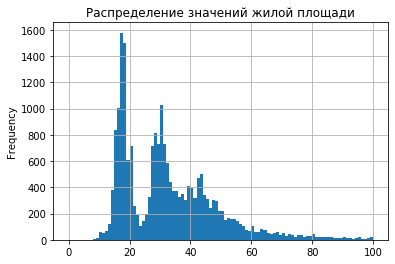

In [112]:
df['living_area'].plot(kind='hist', bins=100, title='Распределение значений жилой площади', range=(0,100), grid=True)

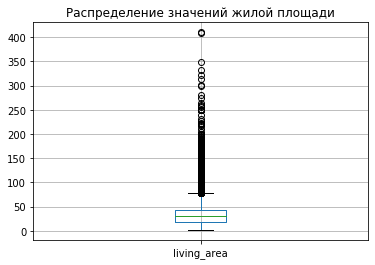

In [113]:
df['living_area'].plot(kind='box', title='Распределение значений жилой площади', grid=True)

In [114]:
df['living_area'].describe()

count    21796.000000
mean        34.457852
std         22.030445
min          2.000000
25%         18.600000
50%         30.000000
75%         42.300000
max        409.700000
Name: living_area, dtype: float64

In [115]:
df.query('living_area > 70').studio.unique()

array([False])

In [116]:
df.query('living_area > 70').studio.unique()

array([False])

In [117]:
df.query('living_area.isnull()').head()

total_images  last_price  total_area first_day_exposition  rooms  \
3              0  64900000.0       159.0  2015-07-24T00:00:00      3   
7              5   7915000.0        71.6  2019-04-18T00:00:00      2   
30            12   2200000.0        32.8  2018-02-19T00:00:00      1   
37            10   1990000.0        45.8  2017-10-28T00:00:00      2   
44            13   5350000.0        40.0  2018-11-18T00:00:00      1   

    ceiling_height  floors_total  living_area  floor is_apartment  studio  \
3              NaN          14.0          NaN      9          NaN   False   
7              NaN          24.0          NaN     22          NaN   False   
30             NaN           9.0          NaN      2          NaN   False   
37             2.5           5.0          NaN      1          NaN   False   
44             NaN          22.0          NaN      3          NaN   False   

    open_plan  kitchen_area  balcony                        locality_name  \
3       False           NaN      0.0                      Санкт-Петербург   
7       False          18.9      2.0                      Санкт-Петербург   
30      False           NaN      NaN                             Коммунар   
37      False           NaN      NaN  поселок городского типа Красный Бор   
44      False           NaN      1.0                      Санкт-Петербург   

    airports_nearest  citycenters_nearest  parks_around3000  parks_nearest  \
3            28098.0               6800.0               2.0           84.0   
7            23982.0              11634.0               0.0            NaN   
30               NaN                  NaN               NaN            NaN   
37               NaN                  NaN               NaN            NaN   
44           30471.0              11603.0               1.0          620.0   

    ponds_around3000  ponds_nearest  days_exposition  meter_price  
3                3.0          234.0            424.0       408176  
7                0.0            NaN              NaN       110544  
30               NaN            NaN             63.0        67073  
37               NaN            NaN            196.0        43449  
44               1.0         1152.0              NaN       133750

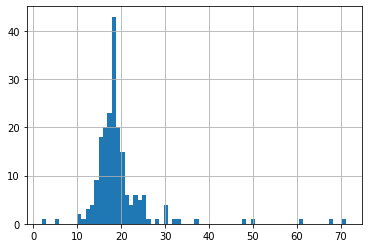

In [118]:
df.query('studio == True or open_plan == True')['living_area'].hist(bins=70)

**Видим, что квартир-студий больше 70 кв.м не бывает. Видим также провал в районе 25 кв.м жилой площади. При свободной планировке или квартире-студии жилая площадь составляет 18 кв.м. Медиана составляет 30 кв.м. Формат данных float64 уместен.**

### Столбец floors_total (всего этажей в доме)

In [119]:
# Выведем долю заполненных строк в floors_total относительно всего датафрейма 

ratio = df.query('~floors_total.isnull()').count().max() / df.shape[0]
print(f'Доля заполненных данных составляет: {ratio:.1%}')

Доля заполненных данных составляет: 99.6%


In [120]:
# Посмотрим на примеры значений незаполненных значений в floors_total. 

df[df['floors_total'].isna()].sample(5)

total_images  last_price  total_area first_day_exposition  rooms  \
4901              5   2200000.0        24.0  2018-10-22T00:00:00      0   
22656             4   4574160.0        64.5  2017-04-02T00:00:00      2   
10058             9   3350000.0        25.0  2018-09-10T00:00:00      1   
10013             4   4558637.0        64.4  2016-09-21T00:00:00      2   
21753             7   6800000.0        57.0  2017-05-01T00:00:00      2   

       ceiling_height  floors_total  living_area  floor is_apartment  studio  \
4901              NaN           NaN          NaN      6          NaN    True   
22656             NaN           NaN         31.7     20          NaN   False   
10058            2.65           NaN         17.0     21          NaN   False   
10013             NaN           NaN         31.7     19          NaN   False   
21753             NaN           NaN          NaN     21          NaN   False   

       open_plan  kitchen_area  balcony    locality_name  airports_nearest  \
4901       False           NaN      NaN    посёлок Бугры               NaN   
22656      False          14.4      0.0  Санкт-Петербург           22041.0   
10058      False           3.5      NaN   посёлок Шушары               NaN   
10013      False          14.4      0.0  Санкт-Петербург           22041.0   
21753      False           NaN      0.0  Санкт-Петербург           17618.0   

       citycenters_nearest  parks_around3000  parks_nearest  ponds_around3000  \
4901                   NaN               NaN            NaN               NaN   
22656              17369.0               0.0            NaN               1.0   
10058                  NaN               NaN            NaN               NaN   
10013              17369.0               0.0            NaN               1.0   
21753              14600.0               2.0          104.0               0.0   

       ponds_nearest  days_exposition  meter_price  
4901             NaN             51.0        91666  
22656          374.0            127.0        70917  
10058            NaN             23.0       134000  
10013          374.0            320.0        70786  
21753            NaN             36.0       119298

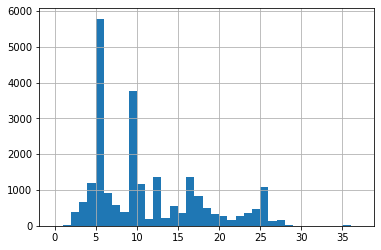

In [121]:
df['floors_total'].hist(bins=37, range=(0,37))

In [122]:
str(set(df['floors_total'].unique()))

'{nan, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 33.0, 34.0, 35.0, 36.0, 37.0, 52.0, 60.0}'

**Видим, пики в 5, 9, 13, 17 и 26 этажей, что соответствует действительности российской массовой застройки. Пропуски можно удалить из-за их совершенно случайного характера и количества в 0,6%. Формат данных по смыслу следует перевести в int64**

### Столбец locality_name (название населённого пункта)

In [123]:
# Выведем долю заполненных строк в locality_name относительно всего датафрейма 

ratio = df.query('~locality_name.isnull()').count().max() / df.shape[0]
print(f'Доля заполненных данных составляет: {ratio:.1%}')

Доля заполненных данных составляет: 99.8%


In [124]:
# Посмотрим на примеры незаполненных значений в locality_name. 

df[df['locality_name'].isna()].sample(5)

total_images  last_price  total_area first_day_exposition  rooms  \
22474             7  24000000.0       128.0  2015-07-24T00:00:00      4   
20654             7   6100000.0        43.0  2016-01-13T00:00:00      1   
7114              5   4250000.0        56.0  2016-03-16T00:00:00      3   
10122             5   8200000.0        83.0  2015-06-24T00:00:00      4   
20382             8   1750000.0        72.9  2018-10-27T00:00:00      3   

       ceiling_height  floors_total  living_area  floor is_apartment  studio  \
22474            2.75           6.0         68.4      6        False   False   
20654             NaN           5.0         21.0      3          NaN   False   
7114              NaN           5.0         40.0      4          NaN   False   
10122             NaN           5.0         53.0      2          NaN   False   
20382             NaN           5.0         47.3      2          NaN   False   

       open_plan  kitchen_area  balcony locality_name  airports_nearest  \
22474      False          16.5      0.0           NaN           23297.0   
20654      False          12.0      1.0           NaN           24385.0   
7114       False           6.0      0.0           NaN           14031.0   
10122      False          10.0      0.0           NaN           25771.0   
20382      False           8.3      NaN           NaN               NaN   

       citycenters_nearest  parks_around3000  parks_nearest  ponds_around3000  \
22474               1780.0               3.0          277.0               3.0   
20654               4604.0               1.0          700.0               0.0   
7114                8582.0               0.0            NaN               0.0   
10122               4474.0               2.0          374.0               0.0   
20382                  NaN               NaN            NaN               NaN   

       ponds_nearest  days_exposition  meter_price  
22474          561.0            436.0       187500  
20654            NaN            164.0       141860  
7114             NaN             96.0        75892  
10122            NaN            364.0        98795  
20382            NaN              NaN        24005

In [125]:
df['locality_name'].value_counts()

Санкт-Петербург      15721
посёлок Мурино         522
посёлок Шушары         440
Всеволожск             398
Пушкин                 369
                     ...  
деревня Зимитицы         1
поселок Кирпичное        1
деревня Пустынка         1
деревня Шпаньково        1
поселок Усть-Луга        1
Name: locality_name, Length: 364, dtype: int64

In [126]:
locality_name_str = list(set(df['locality_name'].dropna().unique()))
locality_name_str

['посёлок Песочный',
 'городской посёлок Рощино',
 'городской посёлок Фёдоровское',
 'посёлок городского типа Сиверский',
 'деревня Нижняя',
 'посёлок Стеклянный',
 'садовое товарищество Приладожский',
 'деревня Новое Девяткино',
 'поселок Красносельское',
 'поселок Заводской',
 'посёлок Стрельна',
 'поселок Семрино',
 'посёлок Шушары',
 'посёлок городского типа Токсово',
 'Всеволожск',
 'деревня Снегирёвка',
 'поселок станции Вещево',
 'деревня Кривко',
 'поселок Пансионат Зелёный Бор',
 'поселок Рябово',
 'деревня Каськово',
 'посёлок при железнодорожной станции Приветнинское',
 'посёлок Дзержинского',
 'деревня Белогорка',
 'Мурино',
 'деревня Бор',
 'поселок городского типа Большая Ижора',
 'посёлок Перово',
 'посёлок городского типа Кузьмоловский',
 'деревня Пельгора',
 'посёлок Парголово',
 'деревня Мануйлово',
 'посёлок Молодёжное',
 'Приморск',
 'поселок городского типа Кондратьево',
 'городской посёлок Новоселье',
 'деревня Лампово',
 'посёлок Торфяное',
 'Бокситогорск',
 'пос

In [127]:
locality_name_str2 = ' '.join(locality_name_str)
locality_name_str2[:1000]

'посёлок Песочный городской посёлок Рощино городской посёлок Фёдоровское посёлок городского типа Сиверский деревня Нижняя посёлок Стеклянный садовое товарищество Приладожский деревня Новое Девяткино поселок Красносельское поселок Заводской посёлок Стрельна поселок Семрино посёлок Шушары посёлок городского типа Токсово Всеволожск деревня Снегирёвка поселок станции Вещево деревня Кривко поселок Пансионат Зелёный Бор поселок Рябово деревня Каськово посёлок при железнодорожной станции Приветнинское посёлок Дзержинского деревня Белогорка Мурино деревня Бор поселок городского типа Большая Ижора посёлок Перово посёлок городского типа Кузьмоловский деревня Пельгора посёлок Парголово деревня Мануйлово посёлок Молодёжное Приморск поселок городского типа Кондратьево городской посёлок Новоселье деревня Лампово посёлок Торфяное Бокситогорск поселок Серебрянский Луга посёлок Сапёрное село Русско-Высоцкое деревня Щеглово деревня Агалатово деревня Кудрово поселок Житково посёлок Александровская посёло

In [128]:
from pymystem3 import Mystem
m = Mystem(entire_input=False)

lemmas = m.lemmatize(locality_name_str2)

from collections import Counter
lemmas_count = Counter(lemmas)
sorted(lemmas_count.items(), key = lambda x: x[1], reverse=True)

[('поселок', 201),
 ('деревня', 106),
 ('городской', 53),
 ('тип', 39),
 ('село', 10),
 ('станция', 8),
 ('бор', 8),
 ('большой', 7),
 ('старый', 7),
 ('новый', 6),
 ('товарищество', 5),
 ('красный', 5),
 ('садовый', 4),
 ('малый', 4),
 ('рощино', 3),
 ('рябово', 3),
 ('муриный', 3),
 ('ижора', 3),
 ('луг', 3),
 ('усть', 3),
 ('лесной', 3),
 ('поляна', 3),
 ('коттеджный', 3),
 ('павлово', 3),
 ('имя', 3),
 ('федоровский', 2),
 ('нижний', 2),
 ('стеклянный', 2),
 ('приладожский', 2),
 ('токсово', 2),
 ('вещево', 2),
 ('пансионат', 2),
 ('зеленый', 2),
 ('при', 2),
 ('железнодорожный', 2),
 ('приветнинский', 2),
 ('перово', 2),
 ('кузьмоловский', 2),
 ('саперный', 2),
 ('русский', 2),
 ('щегловый', 2),
 ('форносовый', 2),
 ('свет', 2),
 ('янино', 2),
 ('назия', 2),
 ('кобраловый', 2),
 ('романовка', 2),
 ('коммунар', 2),
 ('лесогорский', 2),
 ('мичуринский', 2),
 ('бугор', 2),
 ('рабитиц', 2),
 ('никольское', 2),
 ('гарболовый', 2),
 ('коробицыно', 2),
 ('лебяжий', 2),
 ('сосновый', 2),


In [129]:
df[df['locality_name'].str.contains("Павлово") & df['locality_name'].notna()]['locality_name'].unique()

array(['село Павлово', 'городской посёлок Павлово',
       'посёлок городского типа Павлово'], dtype=object)

In [130]:
df[df['locality_name'].str.contains("Коммунар") & df['locality_name'].notna()]['locality_name'].unique()

array(['Коммунар', 'поселок Коммунары'], dtype=object)

In [131]:
df[df['locality_name'].str.contains("Рабитиц") & df['locality_name'].notna()]['locality_name'].unique()

array(['деревня Рабитицы', 'поселок Рабитицы'], dtype=object)

In [132]:
df[df['locality_name'].str.contains("Перово") & df['locality_name'].notna()]['locality_name'].unique()

array(['поселок Перово', 'посёлок Перово'], dtype=object)

In [133]:
df[df['locality_name'].str.contains("Победа") & df['locality_name'].notna()]['locality_name'].unique()

array(['посёлок Победа', 'поселок Победа'], dtype=object)

In [134]:
df[df['locality_name'].str.contains("Любань") & df['locality_name'].notna()]['locality_name'].unique()

array(['Любань', 'поселок Любань'], dtype=object)

In [135]:
df[df['locality_name'].str.contains("Кобралов") & df['locality_name'].notna()]['locality_name'].unique()

array(['посёлок Кобралово', 'поселок Кобралово'], dtype=object)

In [136]:
df[df['locality_name'].str.contains("Нос") & df['locality_name'].notna()]['locality_name'].unique()

array(['поселок Лисий Нос', 'посёлок Лисий Нос'], dtype=object)

In [137]:
df[df['locality_name'].str.contains("Усть") & df['locality_name'].notna()]['locality_name'].unique()

array(['посёлок Усть-Луга', 'поселок Усть-Луга', 'посёлок Усть-Ижора'],
      dtype=object)

In [138]:
df[df['locality_name'].str.contains("Платформа 69-й километр") & df['locality_name'].notna()]['locality_name'].unique()

array(['посёлок Платформа 69-й километр'], dtype=object)

In [139]:
df[df['locality_name'].str.contains("Лесная Поляна") & df['locality_name'].notna()]['locality_name'].unique()

array(['садоводческое некоммерческое товарищество Лесная Поляна'],
      dtype=object)

In [140]:
df[df['locality_name'].str.contains("танци") & df['locality_name'].notna()]['locality_name'].unique()

array(['поселок станции Корнево', 'поселок станции Вещево',
       'поселок станции Приветнинское',
       'посёлок при железнодорожной станции Вещево',
       'посёлок станции Громово',
       'посёлок при железнодорожной станции Приветнинское',
       'посёлок станции Свирь', 'поселок станции Лужайка'], dtype=object)

In [141]:
df[df['locality_name'].str.contains("посёлок") & df['locality_name'].notna()]['locality_name'].unique()

array(['посёлок Шушары', 'городской посёлок Янино-1', 'посёлок Парголово',
       'посёлок Мурино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'посёлок Аннино',
       'посёлок Плодовое', 'посёлок Понтонный', 'посёлок Новый Свет',
       'посёлок Бугры', 'посёлок городского типа Красный Бор',
       'посёлок Молодёжное', 'посёлок Победа',
       'посёлок городского типа Кузьмоловский', 'посёлок Стрельна',
       'посёлок Александровская', 'посёлок Петровское',
       'посёлок городского типа Токсово',
       'посёлок городского типа Вырица', 'посёлок Тельмана',
       'городской посёлок Павлово', 'посёлок Новогорелово',
       'городской посёлок Лесогорский', 'городской посёлок Новоселье',
       'городской посёлок Фёдоровское', 'посёлок Поляны',
       'городской посёлок Мга', 'посёлок городского типа Кузнечное',
       'посёлок городского типа Рощино', 'посёлок Мичуринское',
       'посёлок городского типа имени Мороз

**Видим неявные дубликаты, например "городской поселок Павлово" и "поселок городского типа Павлово". А "село Павлово" и "поселок городского типа Павлово" следует различать. Нужно избавиться от подобных слов в названии. Заменить например "городской поселок", "поселок городского типа", "коттеджный поселок", "посёлок при железнодорожной" и посёлок" на "поселок". Пропуски здесь следует заполнить значением "Не указан". Формат данных соответствующий.**

### Столбец first_day_exposition (дата публикации)

In [142]:
# Выведем долю заполненных строк в first_day_exposition относительно всего датафрейма 

ratio = df.query('~first_day_exposition.isnull()').count().max() / df.shape[0]
print(f'Доля заполненных данных составляет: {ratio:.1%}')

Доля заполненных данных составляет: 100.0%


In [331]:
df['first_day_exposition'].value_counts()

2018-02-01    366
2017-11-10    240
2017-10-13    124
2017-09-27    111
2018-03-26     97
             ... 
2015-10-17      1
2015-03-05      1
2016-08-24      1
2016-12-13      1
2015-09-02      1
Name: first_day_exposition, Length: 1489, dtype: int64

**Пропусков нет. Формат следует перевести в datetime с точностью до дня.**

### Столбец last_price (цена на момент снятия с публикации)

In [332]:
# Выведем долю заполненных строк в last_price относительно всего датафрейма 

ratio = df.query('~last_price.isnull()').count().max() / df.shape[0]
print(f'Доля заполненных данных составляет: {ratio:.1%}')

Доля заполненных данных составляет: 100.0%


In [333]:
# Посмотрим на примеры значений в last_price

df['last_price'].sample(5)

9230     12900000
3177      1800000
6737      6000000
22937     6997000
6211      5350000
Name: last_price, dtype: int64

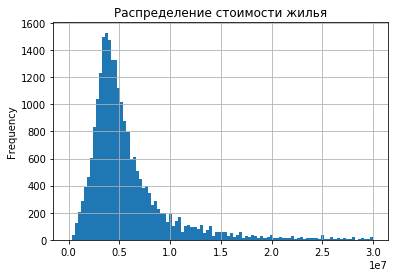

In [334]:
df['last_price'].plot(kind='hist', bins=100, grid=True, range=(0, 30000000), title='Распределение стоимости жилья')

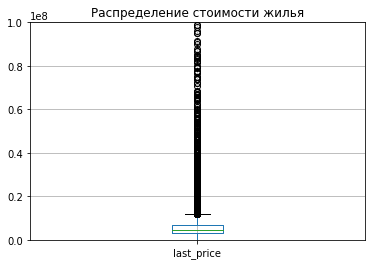

In [335]:
df['last_price'].plot(kind='box', grid=True, ylim=(0, 100000000), title='Распределение стоимости жилья')

In [336]:
df['last_price'].describe()

count    2.361300e+04
mean     6.540555e+06
std      1.090172e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.799000e+06
max      7.630000e+08
Name: last_price, dtype: float64

**Пропусков нет. Стоимость жилья распределена по Пуассону с медианным значением в 4,6 млн. руб. в дипазоне от 1,2 млн. до 763 млн. руб. Формат переведем в int64, чтобы округлить до целых и облегчить расчеты** 

### Столбец total_area (площадь квартиры (м²))

In [337]:
# Выведем долю заполненных строк в total_area относительно всего датафрейма 

ratio = df.query('~total_area.isnull()').count().max() / df.shape[0]
print(f'Доля заполненных данных составляет: {ratio:.1%}')

Доля заполненных данных составляет: 100.0%


In [338]:
# Посмотрим на примеры значений в total_area

df['total_area'].sample(5)

20748     35.96
20099     33.82
10253    103.40
19217     85.00
11737     44.00
Name: total_area, dtype: float64

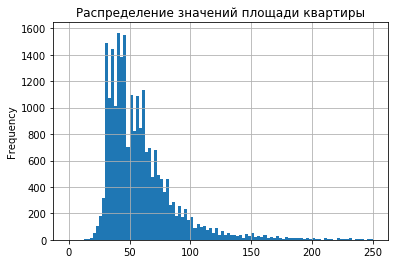

In [339]:
df['total_area'].plot(kind='hist', bins=100, grid=True, range=(0, 250), title='Распределение значений площади квартиры')

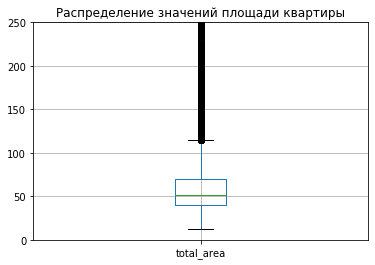

In [340]:
df['total_area'].plot(kind='box', grid=True, ylim=(0, 250), title='Распределение значений площади квартиры')

In [341]:
df['total_area'].describe()

count    23613.000000
mean        60.340678
std         35.648988
min         12.000000
25%         40.000000
50%         52.000000
75%         69.800000
max        900.000000
Name: total_area, dtype: float64

**Пропусков нет. Общая площадь квартиры распределена по Пуассону с медианным значением в 52 кв.м в дипазоне от 12 до 900 кв.м. Заметен провал при 50 кв.м. Формат следует перевести в int64**

### Столбец studio (квартира-студия (булев тип))

In [342]:
# Выведем долю заполненных строк в studio относительно всего датафрейма 

ratio = df.query('~studio.isnull()').count().max() / df.shape[0]
print(f'Доля заполненных данных составляет: {ratio:.1%}')

Доля заполненных данных составляет: 100.0%


In [343]:
# Посмотрим на примеры значений в studio. 

df['studio'].sample(5)

935      False
17256    False
4245     False
21253    False
5757     False
Name: studio, dtype: bool

In [344]:
df['studio'].value_counts()

False    23467
True       146
Name: studio, dtype: int64

**Пропусков нет. Формат данных соответствующий.**

### Столбец rooms (число комнат)

In [345]:
# Выведем долю заполненных строк в rooms относительно всего датафрейма 

ratio = df.query('~rooms.isnull()').count().max() / df.shape[0]
print(f'Доля заполненных данных составляет: {ratio:.1%}')

Доля заполненных данных составляет: 100.0%


In [346]:
df['rooms'].value_counts()

1     8015
2     7913
3     5795
4     1177
5      325
0      194
6      104
7       59
8       12
9        8
10       3
14       2
11       2
19       1
12       1
16       1
15       1
Name: rooms, dtype: int64

In [347]:
str(set(df['rooms'].unique()))

'{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14, 15, 16, 19}'

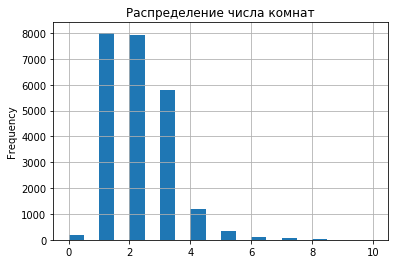

In [348]:
df['rooms'].plot(kind='hist', bins=20, grid=True, range=(0, 10), title='Распределение числа комнат')

In [349]:
df['rooms'].describe()

count    23613.000000
mean         2.071147
std          1.078380
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

In [350]:
df.query('rooms == 0')

total_images  last_price  total_area first_day_exposition  rooms  \
144               1     2450000       27.00           2017-03-30      0   
349               4     2320000       25.00           2017-09-27      0   
440               8     2480000       27.11           2018-03-12      0   
508               0     3375000       34.40           2017-03-28      0   
608               2     1850000       25.00           2019-02-20      0   
...             ...         ...         ...                  ...    ...   
23210             7     3200000       26.00           2017-09-01      0   
23442             0     2500000       27.70           2017-09-28      0   
23554            15     3350000       26.00           2018-09-07      0   
23592            10     1450000       29.00           2017-11-11      0   
23637             8     2350000       26.00           2018-06-26      0   

       ceiling_height  floors_total  living_area  floor  is_apartment  studio  \
144               NaN            24        15.50      2          True    True   
349               NaN            14        17.00      1         False   False   
440               NaN            17        24.75      4          True    True   
508               NaN            26        24.30     19         False   False   
608               NaN            10          NaN      7          True    True   
...               ...           ...          ...    ...           ...     ...   
23210             NaN            25        18.00     16          True    True   
23442             NaN            24        18.00      4         False   False   
23554             NaN            19          NaN      8          True    True   
23592             NaN             9        18.00      8         False   False   
23637             NaN            25        17.00      4          True    True   

       open_plan  kitchen_area  balcony      locality_name  airports_nearest  \
144        False           0.0        2     поселок Мурино               NaN   
349         True           0.0        0    деревня Кудрово               NaN   
440        False           0.0        2    Санкт-Петербург           38171.0   
508         True           0.0        1  поселок Парголово           53115.0   
608        False           0.0        0     поселок Шушары               NaN   
...          ...           ...      ...                ...               ...   
23210      False           0.0        0    Санкт-Петербург           11405.0   
23442       True           0.0        2     поселок Мурино               NaN   
23554      False           0.0        0    Санкт-Петербург           18090.0   
23592       True           0.0        2         Никольское               NaN   
23637      False           0.0        2      поселок Бугры               NaN   

       citycenters_nearest  parks_around3000  parks_nearest  ponds_around3000  \
144                    NaN                 0           3001                 0   
349                    NaN                 0           3001                 0   
440                15015.0                 0           3001                 0   
508                19292.0                 0           3001                 0   
608                    NaN                 0           3001                 0   
...                    ...               ...            ...               ...   
23210              13222.0                 0           3001                 0   
23442                  NaN                 0           3001                 0   
23554              17092.0                 0           3001                 0   
23592                  NaN                 0           3001                 0   
23637                  NaN                 0           3001                 0   

       ponds_nearest  days_exposition  meter_price  weekday_exposition  \
144             3001            181.0        90740                   3   
349             3001             45.0        92800 

In [351]:
df.query('rooms == 0 and ~kitchen_area.isna()')

total_images  last_price  total_area first_day_exposition  rooms  \
144               1     2450000       27.00           2017-03-30      0   
349               4     2320000       25.00           2017-09-27      0   
440               8     2480000       27.11           2018-03-12      0   
508               0     3375000       34.40           2017-03-28      0   
608               2     1850000       25.00           2019-02-20      0   
...             ...         ...         ...                  ...    ...   
23210             7     3200000       26.00           2017-09-01      0   
23442             0     2500000       27.70           2017-09-28      0   
23554            15     3350000       26.00           2018-09-07      0   
23592            10     1450000       29.00           2017-11-11      0   
23637             8     2350000       26.00           2018-06-26      0   

       ceiling_height  floors_total  living_area  floor  is_apartment  studio  \
144               NaN            24        15.50      2          True    True   
349               NaN            14        17.00      1         False   False   
440               NaN            17        24.75      4          True    True   
508               NaN            26        24.30     19         False   False   
608               NaN            10          NaN      7          True    True   
...               ...           ...          ...    ...           ...     ...   
23210             NaN            25        18.00     16          True    True   
23442             NaN            24        18.00      4         False   False   
23554             NaN            19          NaN      8          True    True   
23592             NaN             9        18.00      8         False   False   
23637             NaN            25        17.00      4          True    True   

       open_plan  kitchen_area  balcony      locality_name  airports_nearest  \
144        False           0.0        2     поселок Мурино               NaN   
349         True           0.0        0    деревня Кудрово               NaN   
440        False           0.0        2    Санкт-Петербург           38171.0   
508         True           0.0        1  поселок Парголово           53115.0   
608        False           0.0        0     поселок Шушары               NaN   
...          ...           ...      ...                ...               ...   
23210      False           0.0        0    Санкт-Петербург           11405.0   
23442       True           0.0        2     поселок Мурино               NaN   
23554      False           0.0        0    Санкт-Петербург           18090.0   
23592       True           0.0        2         Никольское               NaN   
23637      False           0.0        2      поселок Бугры               NaN   

       citycenters_nearest  parks_around3000  parks_nearest  ponds_around3000  \
144                    NaN                 0           3001                 0   
349                    NaN                 0           3001                 0   
440                15015.0                 0           3001                 0   
508                19292.0                 0           3001                 0   
608                    NaN                 0           3001                 0   
...                    ...               ...            ...               ...   
23210              13222.0                 0           3001                 0   
23442                  NaN                 0           3001                 0   
23554              17092.0                 0           3001                 0   
23592                  NaN                 0           3001                 0   
23637                  NaN                 0           3001                 0   

       ponds_nearest  days_exposition  meter_price  weekday_exposition  \
144             3001            181.0        90740                   3   
349             3001             45.0        92800 

In [352]:
df.query('rooms.notna() and ceiling_height.notna()')

total_images  last_price  total_area first_day_exposition  rooms  \
0                20    13000000      108.00           2019-03-07      3   
4                 2    10000000      100.00           2018-06-19      2   
9                18     5400000       61.00           2017-02-26      3   
10                5     5050000       39.60           2017-11-16      1   
13               20     3550000       42.80           2017-07-01      2   
...             ...         ...         ...                  ...    ...   
23691            11     9470000       72.90           2016-10-13      2   
23693             9     4600000       62.40           2016-08-05      3   
23694             9     9700000      133.81           2017-03-21      3   
23697            13    11475000       76.75           2017-03-28      2   
23698             4     1350000       32.30           2017-07-21      1   

       ceiling_height  floors_total  living_area  floor  is_apartment  studio  \
0                2.70            16         51.0      8         False   False   
4                3.03            14         32.0     13         False   False   
9                2.50             9         43.6      7         False   False   
10               2.67            12         20.3      3         False   False   
13               2.56             5         27.0      5         False   False   
...               ...           ...          ...    ...           ...     ...   
23691            2.75            25         40.3      7         False   False   
23693            2.60             9         40.0      8         False   False   
23694            3.70             5         73.3      3         False   False   
23697            3.00            17          NaN     12         False   False   
23698            2.50             5         12.3      1         False   False   

       open_plan  kitchen_area  balcony        locality_name  \
0          False         25.00        0      Санкт-Петербург   
4          False         41.00        0      Санкт-Петербург   
9          False          6.50        2      Санкт-Петербург   
10         False          8.50        0      Санкт-Петербург   
13         False          5.20        1             Петергоф   
...          ...           ...      ...                  ...   
23691      False         10.60        1      Санкт-Петербург   
23693      False          8.00        0             Петергоф   
23694      False         13.83        0      Санкт-Петербург   
23697      False         23.30        2      Санкт-Петербург   
23698      False          9.00        0  поселок Новый Учхоз   

       airports_nearest  citycenters_nearest  parks_around3000  parks_nearest  \
0               18863.0              16028.0                 1            482   
4               31856.0               8098.0                 2            112   
9               50898.0              15008.0                 0           3001   
10              38357.0              13878.0                 1            310   
13              37868.0              33058.0                 1            294   
...                 ...                  ...               ...            ...   
23691           19424.0               4489.0                 0           3001   
23693           45602.0              34104.0                 1            352   
23694           24665.0               4232.0                 1            796   
23697           39140.0              10364.0                 2            173   
23698               NaN                  NaN                 0           3001   

       ponds_around3000  ponds_nearest  days_exposition  meter_price  \
0                     2            755              NaN       120370   
4                     1             48            121.0       100000   
9                     0           3001            289.0        88524   
10                    2            553            137.0       127525   
13                    3        

**Число комнат распределено по Пуассону с медианным значением 2 в дипазоне от 0 до 19. Формат int64 соответствующий. Значения 0 в числе комнат соответствует пропускам в кухнях. Значит кухонь там тоже нет, и можно заменить эти пропуски на 0.**

### Столбец floor (этаж)

In [353]:
# Выведем долю заполненных строк в floor относительно всего датафрейма 

ratio = df.query('~floor.isnull()').count().max() / df.shape[0]
print(f'Доля заполненных данных составляет: {ratio:.1%}')

Доля заполненных данных составляет: 100.0%


In [354]:
# Посмотрим на примеры значений незаполненных значений в floor. 

df['floor'].sample(5)

10638    25
11996     4
17065    10
22744    14
4243     17
Name: floor, dtype: int64

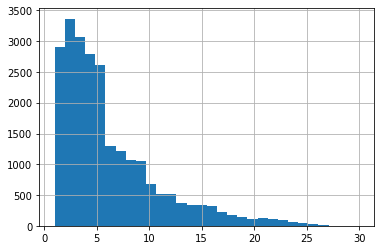

In [355]:
df['floor'].hist(bins=30, range=(1,30))

In [356]:
df['floor'].describe()

count    23613.000000
mean         5.877313
std          4.873539
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

In [357]:
str(set(df['floor'].unique()))

'{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33}'

**Распределение Пуассона от 1 до 33 этажа и медианой - 4 этаж, с резким падением после 5 этажа, связанного с обилием пятиэтажек. Пропусков нет. Формат соответствующий.**

### Столбец open_plan (свободная планировка (булев тип)

In [358]:
# Выведем долю заполненных строк в open_plan относительно всего датафрейма 

ratio = df.query('~open_plan.isnull()').count().max() / df.shape[0]
print(f'Доля заполненных данных составляет: {ratio:.1%}')

Доля заполненных данных составляет: 100.0%


In [359]:
# Посмотрим на примеры значений в open_plan. 

df['open_plan'].sample(5)

1895     False
19259    False
7522     False
8463     False
5560     False
Name: open_plan, dtype: bool

In [360]:
df['open_plan'].value_counts()

False    23546
True        67
Name: open_plan, dtype: int64

**Пропусков нет. Формат данных соответствующий.**

### Столбец total_images (число фотографий квартиры в объявлении)

In [361]:
# Выведем долю заполненных строк в total_images относительно всего датафрейма 

ratio = df.query('~total_images.isnull()').count().max() / df.shape[0]
print(f'Доля заполненных данных составляет: {ratio:.1%}')

Доля заполненных данных составляет: 100.0%


In [362]:
df['total_images'].value_counts().head()

10    1785
9     1723
20    1694
8     1584
7     1519
Name: total_images, dtype: int64

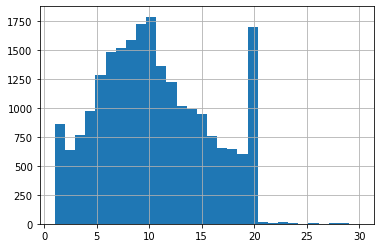

In [363]:
df['total_images'].hist(bins=30, range=(1,30))

In [364]:
df['total_images'].describe()

count    23613.000000
mean         9.874518
std          5.681541
min          0.000000
25%          6.000000
50%          9.000000
75%         14.000000
max         50.000000
Name: total_images, dtype: float64

In [365]:
str(set(df['total_images'].unique()))

'{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 35, 37, 39, 42, 50}'

**Распределение Пуассона от 1 до 50 фото и медианой - 9 фото, с пикам в 1, 10 и 20 фото. Пропусков нет. Формат соответствующий.**

### Вывод

Датафрейм представлен 23699 наблюдениями с 22 фичами. Явных дубликатов не обнаружено. Полные данные, без пропусков, содержатся в 8 столбцах из 22. Больше всего пропусков в столбце is_apartment (апартаменты) булевого типа 20924 пропусками. что составляет 88% от всех наблюдений.

***План для предобработки данных:***

* **airports_nearest (расстояние до ближайшего аэропорта (м)):** 

*Пропуски в 23% оставляем без изменений. Можно было бы удалить из-за их случайного характера, но они нам пока не мешают. Пропуски почти совпадают с пропусками в cityCenters_nearest. Формат оставляем float64*

* **balcony (число балконов):** 

*Пропуски в 49% меняем на 0 вследствие установленной связи - пропуски сделаны там, где балконов нет. Формат данных переводим в int64.*

* **ceiling_height (высота потолков (м)):** 

*Пропуски в 39% пока оставим без изменений. Носят совершенно случайный характер, но их слишком много, чтобы удалить. Можно было бы заменить на медианные значения по группам столбца floor (этаж). Значения больше 20 разделим на 10, т.к. такие большие значения связаны с ошибками ввода. Формат данных оставляем float64.*

* **citycenters_nearest (расстояние до центра города (м)):** 

*Пропуски в 23% оставляем без изменений. Можно было бы удалить из-за их случайного характера, но их слишком много и пока не мешают. Пропуски почти совпадают с пропусками в airports_nearest. Формат оставляем float64*

* **days_exposition (период размещения объявления)**

*От пропусков в этом столбце можно избавляться путем внесения медианного значения 95 дней, или оставить пока как есть. Формат тогда остается.*

* **first_day_exposition (дата публикации)**

*Пропусков нет. Формат переводим в datetime с точностью до дня.*

* **floor (этаж):**

*Пропусков нет. Формат соответствующий.*

* **floors_total (этажность дома):**

*Пропуски удаляем из-за их совершенно случайного характера и количества в 0,6%, а также нам нужны исключительно надежные данные в этом столбце - иначе нельзя дать оценку первого или последнего этажа для квартиры. Формат данных переводим в int64.*

* **is_apartment (апартаменты (булев тип)):**

*Будем заполнять в соответствии со столбцом studio: там где studio - True, is_apartment будет True, где studio = False, is_apartment - False.*

* **kitchen_area (площадь кухни (м²)):**

*Часть пропусков в kitchen_area заменим на 0 в соответствии с True в studio и True в open_plan. Формат остается float64, т.к. пропуски еще останутся.*

* **last_price (цена):**

*Пропусков нет. Формат переведем в int64*

* **living_area (жилая площадь (м²)):**

*Пропуски в 8% оставим без изменений. Формат данных float64 оставляем.*

* **locality_name (название населённого пункта):**

*Заменить "городской поселок", "поселок городского типа", "коттеджный поселок", "посёлок при железнодорожной" и посёлок" на "поселок". Пропуски следует заполнить значением "Не указан". Формат данных соответствующий.*

* **open_plan (свободная планировка (булев тип)):**

*Пропусков нет. Формат данных соответствующий.*

* **parks_around3000 (число парков в радиусе 3 км):**

*Пропуски в parks_around3000 заменим на 0, там где есть пропуски в parks_nearest. Формат переведем в int64.*

* **parks_nearest (расстояние до ближайшего парка (м)):**

*Пропуски частично заменим на значение 3001 для 0 в parks_around3000, что соответствует логике заполнения. Формат оставим из-за пропусков.*

* **ponds_around3000 (число водоёмов в радиусе 3 км):**

*Пропуски частично заменим на 0 в соответсвии с пропусками в ponds_nearest. Формат переведем в int64.*

* **ponds_nearest (расстояние до ближайшего водоёма (м)):**

*Пропуски, что соответствуют 0 в ponds_around3000, заменить на значение 3001. Это соотвествует логике присвоенных значений и в дальнейшем позволит нам разбить данные на категории.*

* **rooms (число комнат):**

*Значения 0 в числе комнат соответствует пропускам в кухнях. Значит кухонь там тоже нет, и можно заменить эти пропуски d кухнях на 0. Формат int64 соответствующий.*

* **studio (квартира-студия (булев тип)):**

*Пропусков нет. Формат данных соответствующий.*

* **total_area (площадь квартиры (м²)):**

*Пропусков нет. Формат соответствующий.*

* **total_images (число фотографий в объявлении):**

*Пропусков нет. Формат соответствующий.*

## Предобработка данных

### Предобработка столбца balcony

In [366]:
df.query('balcony.isna()').total_area.count() # Число пропусков

0

In [367]:
df['balcony'].value_counts() # Распределение значений с пропусками

0    15193
1     4195
2     3657
5      304
4      183
3       81
Name: balcony, dtype: int64

In [368]:
df['balcony'] = df['balcony'].fillna(0).astype('int64') # Замена пропусков на 0 и перевод формата в int64
df.query('balcony.isna()').total_area.count() # Проверка результата

0

In [369]:
# Теперь видим более правильное распределение, ведь в превалирующих по числу пятиэтажках нет балконов

df['balcony'].value_counts() 

0    15193
1     4195
2     3657
5      304
4      183
3       81
Name: balcony, dtype: int64

### Предобработка столбца first_day_exposition

In [370]:
df['first_day_exposition'].value_counts() 

2018-02-01    366
2017-11-10    240
2017-10-13    124
2017-09-27    111
2018-03-26     97
             ... 
2015-10-17      1
2015-03-05      1
2016-08-24      1
2016-12-13      1
2015-09-02      1
Name: first_day_exposition, Length: 1489, dtype: int64

In [371]:
# Перевод формата в datetime с точностью до дня

df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%d')

In [372]:
df['first_day_exposition'].value_counts() # Проверка результата

2018-02-01    366
2017-11-10    240
2017-10-13    124
2017-09-27    111
2018-03-26     97
             ... 
2015-10-17      1
2015-03-05      1
2016-08-24      1
2016-12-13      1
2015-09-02      1
Name: first_day_exposition, Length: 1489, dtype: int64

### Предобработка столбца is_apartment

In [373]:
df.query('is_apartment.isna()').total_area.count() # Число пропусков

0

In [374]:
df['is_apartment'].value_counts() # Распределение значений с пропусками

False    23432
True       181
Name: is_apartment, dtype: int64

In [375]:
# Пропуски заполняем в соответствии со столбцом studio: 
# там где studio - True, пропуск в is_apartment будет True, 
# где studio - False, пропуск в is_apartment - False.

df.loc[df['is_apartment'].isna(), ['is_apartment']] = df['studio'] == True # Замена пропусков
df.query('is_apartment.isna()').total_area.count() # Проверка результата

0

In [376]:
# Проверка результата

df['is_apartment'].value_counts() 

0.0    23432
1.0      181
Name: is_apartment, dtype: int64

### Предобработка столбца kitchen_area

In [377]:
df.query('kitchen_area.isna()').total_area.count() # Число пропусков

2018

In [378]:
df['kitchen_area'].value_counts() # Распределение значений с пропусками

6.00     1300
10.00    1262
8.00     1110
9.00     1100
7.00     1062
         ... 
5.29        1
28.52       1
75.00       1
9.38        1
54.20       1
Name: kitchen_area, Length: 967, dtype: int64

In [379]:
# Часть пропусков в kitchen_area заменим на 0 в соответствии с True в studio и True в open_plan. 
# Значения 0 в числе комнат соответствует пропускам в кухнях. Значит кухонь там тоже нет, и можно заменить эти пропуски на 0. 

#df['is_apartment'] = df.apply(lambda row: 0 if row['studio'] == True, axis=1) # Замена пропусков (в таком виде не работатет)

df['kitchen_area'] = df['kitchen_area'].where(df['studio'] == False & df['kitchen_area'].notna(), 0) # Замена пропусков
df['kitchen_area'] = df['kitchen_area'].where(df['open_plan'] == False & df['kitchen_area'].notna(), 0) # Замена пропусков
df['kitchen_area'] = df['kitchen_area'].where(df['rooms'] != 0 & df['kitchen_area'].notna(), 0)
df.query('kitchen_area.isna()').total_area.count() # Проверка результата

2018

In [380]:
# Проверка результата

df['kitchen_area'].value_counts() 

6.00     1300
10.00    1262
8.00     1110
9.00     1100
7.00     1062
         ... 
5.29        1
28.52       1
75.00       1
9.38        1
54.20       1
Name: kitchen_area, Length: 967, dtype: int64

### Предобработка столбца locality_name

In [381]:
df.query('locality_name.isna()').total_area.count() # Число пропусков

0

In [382]:
df['locality_name'].value_counts() # Распределение значений с пропусками

Санкт-Петербург         15651
поселок Мурино            552
поселок Шушары            439
Всеволожск                398
Пушкин                    369
                        ...  
деревня Куровицы            1
деревня Вахнова Кара        1
поселок Ромашки             1
поселок Почап               1
поселок Белоостров          1
Name: locality_name, Length: 320, dtype: int64

In [383]:
df['locality_name'] = df['locality_name'].fillna('Не указан') # Замена пропусков 
df.query('locality_name.isna()').total_area.count() # Проверка результата

0

In [384]:
# Проверка результата

df[df['locality_name'] == 'Не указан']['locality_name'].count()

48

In [385]:
# Заменим "городской поселок", "поселок городского типа", "коттеджный поселок", 
# "посёлок при железнодорожной" и "посёлок" на "поселок" и заменим букву "ё" на "е" 

to_remove = ["городской ", "городского типа ", "коттеджный ", "при железнодорожной "]
to_remove_str = '|'.join(to_remove)
df['locality_name'] = df['locality_name'].replace(to_remove_str, '', regex=True) # Удаление выражений
df['locality_name'] = df['locality_name'].replace('ё', 'е', regex=True) # Замена "ё" на "е"
df['locality_name'] = df['locality_name'].replace('садоводческое некоммерческое', 'садовое', regex=True)
df[df['locality_name'].str.contains("посёлок")]['locality_name'].count() # Проверка результата

0

In [386]:
df[df['locality_name'].str.contains("Павлово")]['locality_name'].unique() # Проверка результата

array(['село Павлово', 'поселок Павлово'], dtype=object)

### Предобработка столбцов parks_around3000 и ponds_around3000

In [387]:
df.query('parks_around3000.isna()').total_area.count() # Число пропусков

0

In [388]:
df.query('ponds_around3000.isna()').total_area.count() # Число пропусков

0

In [389]:
df['parks_around3000'].value_counts() # Распределение значений с пропусками

0    15572
1     5657
2     1739
3      645
Name: parks_around3000, dtype: int64

In [390]:
df['ponds_around3000'].value_counts() # Распределение значений с пропусками

0    18813
1     2556
3     1203
2     1041
Name: ponds_around3000, dtype: int64

In [391]:
# Пропуски в parks_around3000 заменим на 0, там где есть пропуски в parks_nearest. 
# Пропуски в ponds_around3000 заменим на 0 в соответсвии с пропусками в ponds_nearest. 

df['parks_around3000'] = df['parks_around3000'].where(df['parks_nearest'].notna(), 0) # Замена пропусков в parks_around3000
df['ponds_around3000'] = df['ponds_around3000'].where(df['parks_nearest'].notna(), 0) # Замена пропусков в ponds_around3000
print(df.query('parks_around3000.isna()').total_area.count()) # Проверка результата
print(df.query('ponds_around3000.isna()').total_area.count()) # Проверка результата

0
0


In [392]:
df['parks_around3000'] = df['parks_around3000'].astype('int64') # Перевод формата в int64
df['ponds_around3000'] = df['ponds_around3000'].astype('int64')

In [393]:
# Проверка результата

df['parks_around3000'].value_counts() 

0    15572
1     5657
2     1739
3      645
Name: parks_around3000, dtype: int64

In [394]:
df['ponds_around3000'].value_counts()

0    18813
1     2556
3     1203
2     1041
Name: ponds_around3000, dtype: int64

### Предобработка столбцов parks_nearest и ponds_nearest

In [395]:
df.query('parks_nearest.isna()').total_area.count() # Число пропусков

0

In [396]:
df.query('ponds_nearest.isna()').total_area.count() # Число пропусков

0

In [397]:
df['parks_nearest'].value_counts() # Распределение значений с пропусками

3001    15572
441        67
392        41
173        41
456        40
        ...  
808         1
769         1
2905        1
859         1
969         1
Name: parks_nearest, Length: 993, dtype: int64

In [398]:
df['ponds_nearest'].value_counts() # Распределение значений с пропусками

3001    18813
427        62
454        33
303        32
474        29
        ...  
918         1
870         1
582         1
438         1
40          1
Name: ponds_nearest, Length: 985, dtype: int64

In [399]:
# Пропуски в parks_nearest заменим на 3001, там где 0 в parks_around3000. 
# Пропуски в ponds_nearest заменим на 3001 в соответсвии с 0 в ponds_around3000. 

# Замена пропусков в parks_around3000

df['parks_nearest'] = df['parks_nearest'].where(df['parks_around3000'] != 0 & df['parks_nearest'].notna(), 3001) 

# Замена пропусков в ponds_around3000

df['ponds_nearest'] = df['ponds_nearest'].where(df['ponds_around3000'] != 0 & df['ponds_nearest'].notna(), 3001) 

print(df.query('parks_nearest.isna()').total_area.count()) # Проверка результата
print(df.query('ponds_nearest.isna()').total_area.count()) # Проверка результата

0
0


In [400]:
df['parks_nearest'] = df['parks_nearest'].astype('int64') # Перевод формата в int64
df['ponds_nearest'] = df['ponds_nearest'].astype('int64')

In [401]:
# Проверка результата

df['parks_nearest'].value_counts() 

3001    15572
441        67
392        41
173        41
456        40
        ...  
808         1
769         1
2905        1
859         1
969         1
Name: parks_nearest, Length: 993, dtype: int64

In [402]:
df['ponds_nearest'].value_counts()

3001    18813
427        62
454        33
303        32
474        29
        ...  
918         1
870         1
582         1
438         1
40          1
Name: ponds_nearest, Length: 985, dtype: int64

### Предобработка столбца floors_total

In [403]:
df.query('floors_total.isna()').total_area.count() # Число пропусков

0

In [404]:
df['floors_total'].unique() # Уникальные значения

array([16, 11,  5, 14, 12, 26, 24, 27,  9,  6, 17, 25,  3, 23, 19, 18,  4,
       22,  8,  2, 10,  7, 13, 15, 20, 28, 36, 21, 35, 34, 60,  1, 29, 33,
       52, 37])

In [405]:
df.dropna(subset=['floors_total'], inplace=True) # Удаление пропусков 
df['floors_total'] = df['floors_total'].astype('int64') # Перевод формата в int64
df.query('floors_total.isna()').total_area.count() # Проверка результата

0

In [406]:
df['floors_total'].unique() # Проверка результата

array([16, 11,  5, 14, 12, 26, 24, 27,  9,  6, 17, 25,  3, 23, 19, 18,  4,
       22,  8,  2, 10,  7, 13, 15, 20, 28, 36, 21, 35, 34, 60,  1, 29, 33,
       52, 37])

### Предобработка столбца last_price

In [407]:
df.last_price.value_counts() # Число пропусков

4500000     341
3500000     291
4000000     260
4300000     260
4200000     259
           ... 
22932404      1
4288000       1
6519750       1
9899000       1
12288000      1
Name: last_price, Length: 2939, dtype: int64

In [408]:
df['last_price'] = df['last_price'].astype('int64') # Перевод формата в int64
df.last_price.value_counts() # Проверка результата

4500000     341
3500000     291
4000000     260
4300000     260
4200000     259
           ... 
22932404      1
4288000       1
6519750       1
9899000       1
12288000      1
Name: last_price, Length: 2939, dtype: int64

### Предобработка столбца ceiling_height 

In [409]:
df.ceiling_height.value_counts() # Число пропусков

2.50    3522
2.60    1647
2.70    1581
3.00    1111
2.80     988
        ... 
3.59       1
2.26       1
4.80       1
4.06       1
4.14       1
Name: ceiling_height, Length: 176, dtype: int64

In [410]:
df.query('ceiling_height > 5').ceiling_height.value_counts() # Проверка результата

8.0     3
5.3     2
5.8     1
10.3    1
5.2     1
8.3     1
5.6     1
10.0    1
6.0     1
14.0    1
5.5     1
Name: ceiling_height, dtype: int64

In [411]:
# Значения больше 20 разделим на 10, т.к. вероятнее всего они связаны с ошибками ввода.

df.loc[df['ceiling_height'] >= 20, 'ceiling_height'] = df.loc[df['ceiling_height'] >= 20, 'ceiling_height'] / 10 
df.ceiling_height.value_counts() # Проверка результата.

2.50    3522
2.60    1647
2.70    1581
3.00    1111
2.80     988
        ... 
3.59       1
2.26       1
4.80       1
4.06       1
4.14       1
Name: ceiling_height, Length: 176, dtype: int64

In [412]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23613 entries, 0 to 23698
Data columns (total 29 columns):
total_images            23613 non-null int64
last_price              23613 non-null int64
total_area              23613 non-null float64
first_day_exposition    23613 non-null datetime64[ns]
rooms                   23613 non-null int64
ceiling_height          14495 non-null float64
floors_total            23613 non-null int64
living_area             21743 non-null float64
floor                   23613 non-null int64
is_apartment            23613 non-null float64
studio                  23613 non-null bool
open_plan               23613 non-null bool
kitchen_area            21595 non-null float64
balcony                 23613 non-null int64
locality_name           23613 non-null object
airports_nearest        18081 non-null float64
citycenters_nearest     18104 non-null float64
parks_around3000        23613 non-null int64
parks_nearest           23613 non-null int64
ponds_around30

### Вывод

Итак, видим, что пропусков стало гораздо меньше. Максимальное количество в столбце высоты потолков. 

Частично незаполненными и с исходным форматом остались следующие столбцы: 
    
*ceiling_height, living_area, kitchen_area, airports_nearest, citycenters_nearest, days_exposition*

## Расчёты и добавление результатов в таблицу

Посчитаем и добавим в датафрейм следующие параметры:
* цена квадратного метра (столбец meter_price);
* день недели, месяц и год публикации объявления (столбцы weekday_exposition, month_exposition, year_exposition);
* этаж квартиры: первый, последний, другой (столбец floor_class);
* соотношение жилой и общей площади, а также отношение площади кухни к общей (столбцы living_area_ratio, kitchen_area_ratio).

Столбец meter_price цены квадратного метра был ранее добавлен в датафрейм

In [413]:
df['meter_price'].value_counts()

100000    259
83333      70
75000      59
80000      52
66666      52
         ... 
56346       1
41612       1
71355       1
106170      1
65536       1
Name: meter_price, Length: 14242, dtype: int64

Добавим в датафрейм столбцы дня недели, месяца и года публикации объявления

In [414]:
df['weekday_exposition'] = df['first_day_exposition'].dt.weekday
df['weekday_exposition'].value_counts()

3    4285
1    4170
4    3988
2    3956
0    3602
5    1922
6    1690
Name: weekday_exposition, dtype: int64

In [415]:
df['month_exposition'] = df['first_day_exposition'].dt.month
df['month_exposition'].value_counts()

2     2637
3     2580
11    2364
4     2362
10    2111
9     1974
6     1752
8     1741
7     1690
12    1641
1     1496
5     1265
Name: month_exposition, dtype: int64

In [416]:
df['year_exposition'] = df['first_day_exposition'].dt.year
df['year_exposition'].value_counts()

2018    8492
2017    8166
2019    2871
2016    2763
2015    1184
2014     137
Name: year_exposition, dtype: int64

Добавим в таблицу столбец категории этажа квартиры: первый, последний, другой

In [417]:
df['floor_class'] = df.apply(
    lambda row: 'первый' if row['floor'] == 1 
    else 'последний' if row['floor'] == row['floors_total']
    else 'другой', axis=1)

df['floor_class'].value_counts()

другой       17363
последний     3336
первый        2914
Name: floor_class, dtype: int64

Добавим в таблицу столбцы соотношения жилой и общей площади, а также отношения площади кухни к общей. Округлим до 2-го знака.

In [418]:
df['living_area_ratio'] = (df['living_area'] / df['total_area']).round(2)
df['kitchen_area_ratio'] = (df['kitchen_area'] / df['total_area']).round(2)

df['living_area_ratio'].value_counts()

0.56    901
0.55    880
0.60    835
0.62    823
0.58    814
       ... 
0.04      1
0.09      1
0.14      1
0.13      1
0.02      1
Name: living_area_ratio, Length: 91, dtype: int64

In [419]:
df['kitchen_area_ratio'].value_counts()

0.14    1513
0.16    1405
0.12    1394
0.15    1372
0.13    1337
        ... 
0.60       1
0.68       1
0.66       1
0.79       1
0.64       1
Name: kitchen_area_ratio, Length: 67, dtype: int64

In [420]:
df[['meter_price', 'weekday_exposition', 'month_exposition', 'year_exposition', \
    'floor_class', 'living_area_ratio', 'kitchen_area_ratio']].head()

meter_price  weekday_exposition  month_exposition  year_exposition  \
0       120370                   3                 3             2019   
1        82920                   1                12             2018   
2        92785                   3                 8             2015   
3       408176                   4                 7             2015   
4       100000                   1                 6             2018   

  floor_class  living_area_ratio  kitchen_area_ratio  
0      другой               0.47                0.23  
1      первый               0.46                0.27  
2      другой               0.61                0.15  
3      другой                NaN                 NaN  
4      другой               0.32                0.41

### Вывод

Все задания на этом этапе выполнены:

Посчитаны и добавлены в таблицу
* цена квадратного метра (столбец meter_price);
* день недели, месяц и год публикации объявления (столбцы weekday_exposition, month_exposition, year_exposition);
* этаж квартиры: первый, последний, другой (столбец floor_class);
* соотношение жилой и общей площади, а также отношение площади кухни к общей (столбцы living_area_ratio, kitchen_area_ratio).

## Исследовательский анализ данных

Изучим следующие параметры: площадь, цена, число комнат, высота потолков

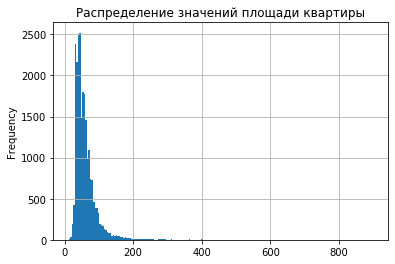

In [421]:
df['total_area'].plot(kind='hist', bins=200, grid=True, title='Распределение значений площади квартиры')

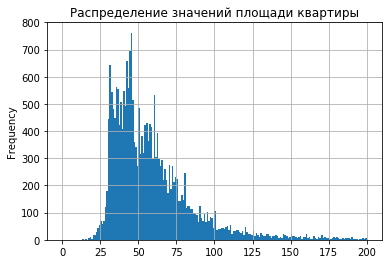

In [422]:
df['total_area'].plot(kind='hist', bins=200, grid=True, range=(0, 200), title='Распределение значений площади квартиры')

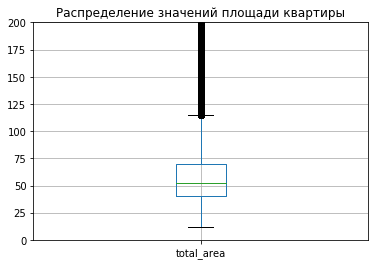

In [423]:
df['total_area'].plot(kind='box', grid=True, ylim=(0, 200), title='Распределение значений площади квартиры')

In [424]:
df['total_area'].describe()

count    23613.000000
mean        60.340678
std         35.648988
min         12.000000
25%         40.000000
50%         52.000000
75%         69.800000
max        900.000000
Name: total_area, dtype: float64

**Общая площадь квартиры распределена по Пуассону с медианным значением в 52 кв.м и средним 60 кв.м в дипазоне от 12 до 900 кв.м. Заметен провал при 50 кв.м. Большой разрыв между средним и медианой указывает на значительные выбросы справа. Для исключения выбросов следует ограничиться диапазоном от от 12 до 200 кв.м.**

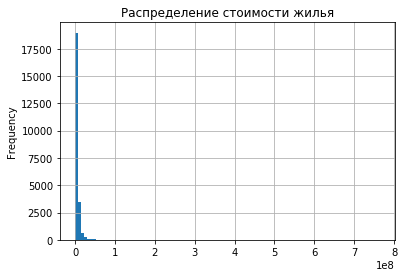

In [425]:
df['last_price'].plot(kind='hist', bins=100, grid=True, title='Распределение стоимости жилья')

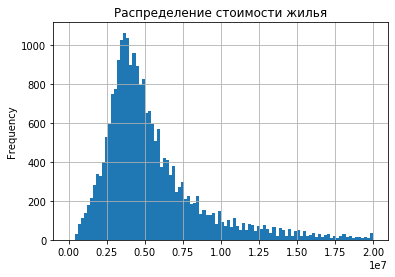

In [426]:
df['last_price'].plot(kind='hist', bins=100, grid=True, range=(0, 20000000), title='Распределение стоимости жилья')

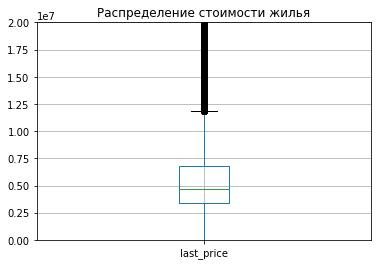

In [427]:
df['last_price'].plot(kind='box', grid=True, ylim=(0, 20000000), title='Распределение стоимости жилья')

In [428]:
df['last_price'].describe()

count    2.361300e+04
mean     6.540555e+06
std      1.090172e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.799000e+06
max      7.630000e+08
Name: last_price, dtype: float64

**Стоимость жилья распределена по Пуассону с медианным значением в 4,6 млн. руб. и средним в 6,5 млн. руб. в дипазоне от 1,2 млн. до 763 млн. руб. Для исключения выбросов следует ограничиться диапазоном от 1,2 млн. до 20 млн. руб.** 

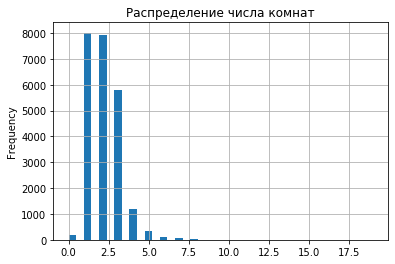

In [429]:
df['rooms'].plot(kind='hist', bins=40, grid=True, title='Распределение числа комнат')

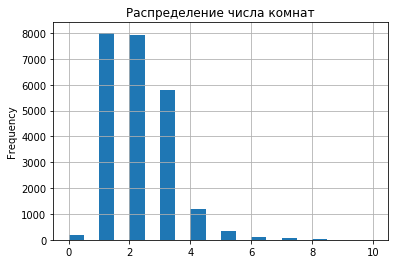

In [430]:
df['rooms'].plot(kind='hist', bins=20, grid=True, range=(0, 10), title='Распределение числа комнат')

In [431]:
df['rooms'].describe()

count    23613.000000
mean         2.071147
std          1.078380
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

**Число комнат распределено по Пуассону с медианным значением 2 и средним 2 в дипазоне от 0 до 19. Для исключения выбросов следует ограничиться диапазоном от 0 до 8 комнат**

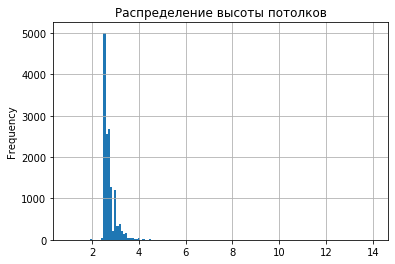

In [432]:
df['ceiling_height'].plot(kind='hist', bins=140, grid=True, title='Распределение высоты потолков')

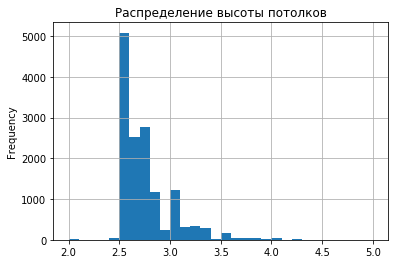

In [433]:
df['ceiling_height'].plot(kind='hist', bins=30, grid=True, title='Распределение высоты потолков', range=(2,5))

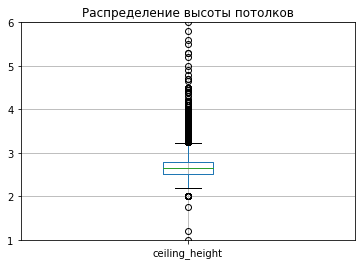

In [434]:
df['ceiling_height'].plot(kind='box', grid=True, title='Распределение высоты потолков', ylim=(1,6))

In [435]:
df['ceiling_height'].describe()

count    14495.000000
mean         2.729578
std          0.319937
min          1.000000
25%          2.510000
50%          2.650000
75%          2.800000
max         14.000000
Name: ceiling_height, dtype: float64

**Стоимость жилья распределена по Пуассону с медианным значением в 2,65 м и средним в 2,77 м в дипазоне от 1 м до 100 м. Действительно, 2,65 м - стандартная высота потолков в России. 1 м - похоже на подвал и 100 м - на ошибку ввода. Все значения больше 20 м следует разделить на 10 и после взять срез от 2 до 4 м**

Изучим время продажи квартиры

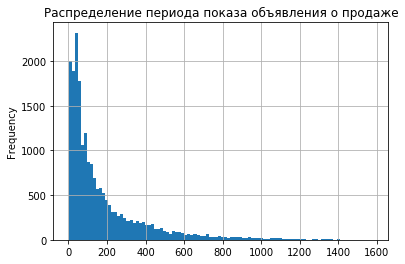

In [436]:
df['days_exposition'].plot(kind='hist', bins=100, \
                           title='Распределение периода показа объявления о продаже', grid=True)

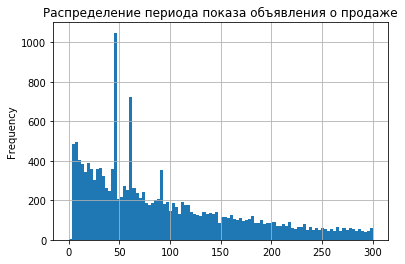

In [437]:
df['days_exposition'].plot(kind='hist', bins=100, range=(0,300),\
                           title='Распределение периода показа объявления о продаже', grid=True)

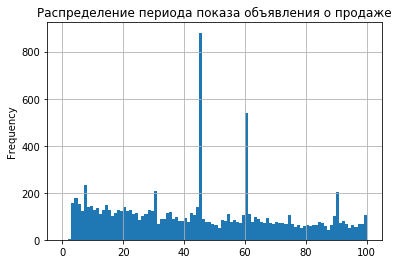

In [438]:
df['days_exposition'].plot(kind='hist', bins=100, range=(0,100),\
                           title='Распределение периода показа объявления о продаже', grid=True)

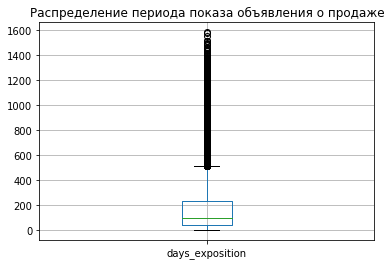

In [439]:
df['days_exposition'].plot(kind='box', title='Распределение периода показа объявления о продаже', grid=True)

In [440]:
df['days_exposition'].describe()

count    20441.000000
mean       180.884839
std        219.685543
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

In [441]:
df[(df['days_exposition'] < 100) & (df['days_exposition'] > 30)]['days_exposition'].describe()

count    6743.000000
mean       60.642296
std        18.904486
min        31.000000
25%        45.000000
50%        60.000000
75%        75.000000
max        99.000000
Name: days_exposition, dtype: float64

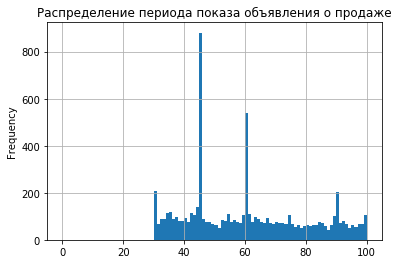

In [442]:
df.query('30 <= days_exposition <= 100')['days_exposition'].plot(kind='hist', bins=100, range=(0,100),\
                           title='Распределение периода показа объявления о продаже', grid=True)

**Период показа объявления о продаже распределен по Пуассону с медианным значением в 95 дней и средним в 181 день в дипазоне от 1 до 1580 дней. Типичное значение продажи 45 и 60 дней, пики есть в 5, 30 и 90 дней. Можно считать, что продажи прошли очень быстро, если значение меньше 30 дней, и необычно долго - когда больше 600 дней.**

Убираем редкие и выбивающиеся значения

In [443]:
good_data_df = df.query(
    '2 <= ceiling_height <= 4 & \
    0 <= rooms <= 8 & \
    1200000 <= last_price <= 20000000 & \
    12 <= total_area <= 200')

good_data_df.head()

total_images  last_price  total_area first_day_exposition  rooms  \
0             20    13000000       108.0           2019-03-07      3   
4              2    10000000       100.0           2018-06-19      2   
9             18     5400000        61.0           2017-02-26      3   
10             5     5050000        39.6           2017-11-16      1   
13            20     3550000        42.8           2017-07-01      2   

    ceiling_height  floors_total  living_area  floor  is_apartment  studio  \
0             2.70            16         51.0      8           0.0   False   
4             3.03            14         32.0     13           0.0   False   
9             2.50             9         43.6      7           0.0   False   
10            2.67            12         20.3      3           0.0   False   
13            2.56             5         27.0      5           0.0   False   

    open_plan  kitchen_area  balcony    locality_name  airports_nearest  \
0       False          25.0        0  Санкт-Петербург           18863.0   
4       False          41.0        0  Санкт-Петербург           31856.0   
9       False           6.5        2  Санкт-Петербург           50898.0   
10      False           8.5        0  Санкт-Петербург           38357.0   
13      False           5.2        1         Петергоф           37868.0   

    citycenters_nearest  parks_around3000  parks_nearest  ponds_around3000  \
0               16028.0                 1            482                 2   
4                8098.0                 2            112                 1   
9               15008.0                 0           3001                 0   
10              13878.0                 1            310                 2   
13              33058.0                 1            294                 3   

    ponds_nearest  days_exposition  meter_price  weekday_exposition  \
0             755              NaN       120370                   3   
4              48            121.0       100000                   1   
9            3001            289.0        88524                   6   
10            553            137.0       127525                   3   
13            298            366.0        82943                   5   

    month_exposition  year_exposition floor_class  living_area_ratio  \
0                  3             2019      другой               0.47   
4                  6             2018      другой               0.32   
9                  2             2017      другой               0.71   
10                11             2017      другой               0.51   
13                 7             2017   последний               0.63   

    kitchen_area_ratio  
0                 0.23  
4                 0.41  
9                 0.11  
10                0.21  
13                0.12

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe4bd594f10>]],
      dtype=object)

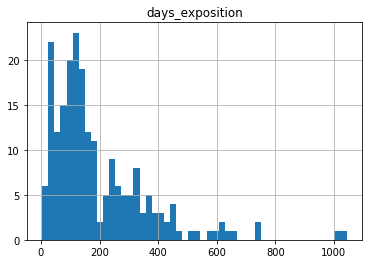

In [444]:
# Сгруппируем медианы периода публикации объявления по населенным пунктам

good_data_df.pivot_table(index='locality_name', values='days_exposition', aggfunc='median').hist(bins=50)

In [445]:
good_data_df.pivot_table(index='locality_name', values='days_exposition').describe()

days_exposition
count       213.000000
mean        229.155200
std         153.432667
min           4.000000
25%         126.666667
50%         196.800000
75%         284.500000
max        1007.000000

Видим, что средняя и медиана периода публикации объявления практически сравнялись

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe4bd5940d0>]],
      dtype=object)

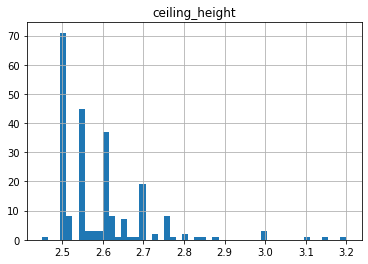

In [446]:
# Сгруппируем медианы высоты потолка по населенным пунктам

good_data_df.pivot_table(index='locality_name', values='ceiling_height', aggfunc='median').hist(bins=50)

In [447]:
good_data_df.pivot_table(index='locality_name', values='ceiling_height').describe()

ceiling_height
count      230.000000
mean         2.608907
std          0.110762
min          2.433333
25%          2.533333
50%          2.596863
75%          2.650000
max          3.200000

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe4bd399110>]],
      dtype=object)

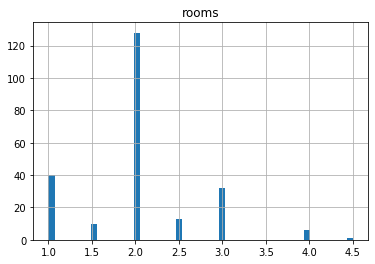

In [448]:
# Сгруппируем медианы числа комнат по населенным пунктам

good_data_df.pivot_table(index='locality_name', values='rooms', aggfunc='median').hist(bins=50)

In [449]:
good_data_df.pivot_table(index='locality_name', values='rooms').describe()

rooms
count  230.000000
mean     2.082559
std      0.608901
min      1.000000
25%      1.752155
50%      2.000000
75%      2.333333
max      4.500000

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe4bd2ff4d0>]],
      dtype=object)

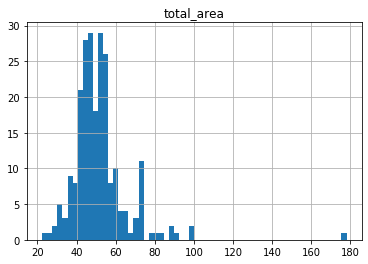

In [450]:
# Сгруппируем медианы общей площади квартир по населенным пунктам

good_data_df.pivot_table(index='locality_name', values='total_area', aggfunc='median').hist(bins=60)

In [451]:
good_data_df.pivot_table(index='locality_name', values='total_area').describe()

total_area
count  230.000000
mean    53.238386
std     14.360874
min     22.400000
25%     46.450000
50%     51.350000
75%     56.753409
max    178.000000

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe4bd105890>]],
      dtype=object)

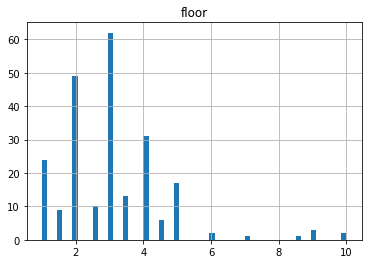

In [452]:
# Сгруппируем медианы общей площади квартир по населенным пунктам

good_data_df.pivot_table(index='locality_name', values='floor', aggfunc='median').hist(bins=60)

In [453]:
good_data_df.pivot_table(index='locality_name', values='floor').describe()

floor
count  230.000000
mean     3.225921
std      1.654943
min      1.000000
25%      2.252717
50%      3.000000
75%      3.839912
max     11.343066

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe4bd067310>]],
      dtype=object)

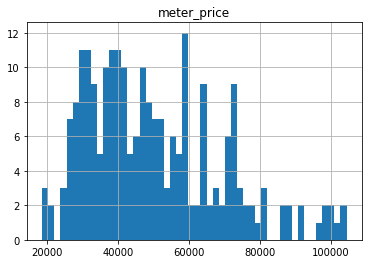

In [454]:
# Сгруппируем медианы общей стоимости квартир по населенным пунктам

good_data_df.pivot_table(index='locality_name', values='meter_price', aggfunc='median').hist(bins=50)

In [455]:
good_data_df.pivot_table(index='locality_name', values='meter_price').describe()

meter_price
count     230.000000
mean    50573.253390
std     19384.919635
min     19230.000000
25%     36117.968750
50%     46957.800000
75%     61756.367647
max    109410.209300

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe4bcf51e50>]],
      dtype=object)

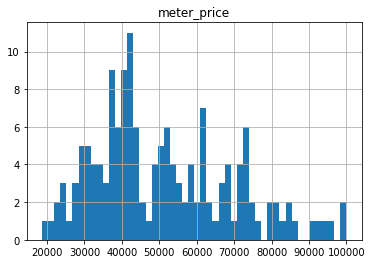

In [456]:
# Сгруппируем для первого этажа медианы цены квадратного метра квартир по населенным пунктам 
(
good_data_df
    .query('floor_class == "первый"')
    .pivot_table(index='locality_name', values='meter_price', aggfunc='median')
    .hist(bins=50)
)

In [457]:
(
good_data_df
    .query('floor_class == "первый"')
    .pivot_table(index='locality_name', values='meter_price', aggfunc='median')
    .describe()
)

meter_price
count     151.000000
mean    51055.013245
std     18428.237487
min     18666.000000
25%     37890.500000
50%     47291.000000
75%     63098.000000
max    100000.000000

Видим, что медианы и средние после отсечения выбросов практически сравнялись 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe4bce60990>]],
      dtype=object)

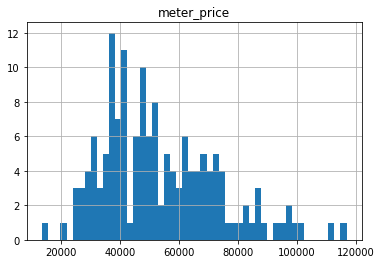

In [458]:
# Сгруппируем для последнего этажа медианы цены квадратного метра квартир по населенным пунктам 
(
good_data_df
    .query('floor_class == "последний"')
    .pivot_table(index='locality_name', values='meter_price', aggfunc='median')
    .hist(bins=50)
)

In [459]:
(
good_data_df
    .query('floor_class == "последний"')
    .pivot_table(index='locality_name', values='meter_price', aggfunc='median')
    .describe()
)

meter_price
count     151.000000
mean    53523.443709
std     19812.076768
min     13483.000000
25%     38147.500000
50%     50000.000000
75%     66754.750000
max    116921.000000

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe4bcd68b50>]],
      dtype=object)

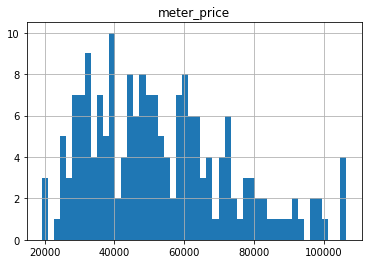

In [460]:
# Сгруппируем для всех этажей кроме первого и последнего медианы цены квадратного метра квартир по населенным пунктам 
(
good_data_df
    .query('floor_class == "другой"')
    .pivot_table(index='locality_name', values='meter_price', aggfunc='median')
    .hist(bins=50)
)

In [461]:
(
good_data_df
    .query('floor_class == "другой"')
    .pivot_table(index='locality_name', values='meter_price', aggfunc='median')
    .describe()
)

meter_price
count     188.000000
mean    53229.739362
std     20170.724815
min     19230.000000
25%     37751.875000
50%     50292.500000
75%     64607.750000
max    106521.000000

In [462]:
df.groupby('year_exposition')['meter_price'].count()

year_exposition
2014     137
2015    1184
2016    2763
2017    8166
2018    8492
2019    2871
Name: meter_price, dtype: int64

In [463]:
df['first_day_exposition'].min()

Timestamp('2014-11-27 00:00:00')

In [464]:
df['first_day_exposition'].max()

Timestamp('2019-05-03 00:00:00')

Заметно увеличение числа объявлений от года к году, особенно между 2016 и 2017 гг., провалы в первом и последнем годах связаны с неполными данными - первое наблюдение 27.11.2014 и последнее - 3.05.2019

In [465]:
df.groupby('month_exposition')['meter_price'].count()

month_exposition
1     1496
2     2637
3     2580
4     2362
5     1265
6     1752
7     1690
8     1741
9     1974
10    2111
11    2364
12    1641
Name: meter_price, dtype: int64

Видим, что в заметно меньше объявлений публиковалось в первые и последние месяцы года, а также в мае, что связано с большим количеством праздничных дней и уменьшением деловой активности в эти месяцы.

In [466]:
df.groupby('weekday_exposition')['meter_price'].count()

weekday_exposition
0    3602
1    4170
2    3956
3    4285
4    3988
5    1922
6    1690
Name: meter_price, dtype: int64

Видим, что в выходные публиковалось в 2 раза меньше всего объявлений, чем в будние дни. В будние примерно одинаково.

Факторы, больше всего влияющие на стоимость квартиры

In [467]:
good_data_df.corr().last_price

total_images           0.153209
last_price             1.000000
total_area             0.779446
rooms                  0.505139
ceiling_height         0.511100
floors_total           0.119205
living_area            0.666949
floor                  0.095684
is_apartment          -0.027279
studio                -0.053417
open_plan             -0.018243
kitchen_area           0.581057
balcony                0.035215
airports_nearest      -0.031692
citycenters_nearest   -0.354014
parks_around3000       0.275072
parks_nearest         -0.271404
ponds_around3000       0.256374
ponds_nearest         -0.243377
days_exposition        0.116034
meter_price            0.620943
weekday_exposition    -0.023405
month_exposition       0.003408
year_exposition       -0.023792
living_area_ratio      0.023844
kitchen_area_ratio    -0.090386
Name: last_price, dtype: float64

In [468]:
cols = good_data_df.corr().last_price.index
cols

Index(['total_images', 'last_price', 'total_area', 'rooms', 'ceiling_height',
       'floors_total', 'living_area', 'floor', 'is_apartment', 'studio',
       'open_plan', 'kitchen_area', 'balcony', 'airports_nearest',
       'citycenters_nearest', 'parks_around3000', 'parks_nearest',
       'ponds_around3000', 'ponds_nearest', 'days_exposition', 'meter_price',
       'weekday_exposition', 'month_exposition', 'year_exposition',
       'living_area_ratio', 'kitchen_area_ratio'],
      dtype='object')

In [526]:
stat_table = good_data_df[['total_images', 'last_price', 'total_area', 'rooms', 'ceiling_height',
    'living_area', 'floor', 'kitchen_area', 'balcony', 'airports_nearest','citycenters_nearest']].reset_index()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe4ad6963d0>,
      dtype=object)

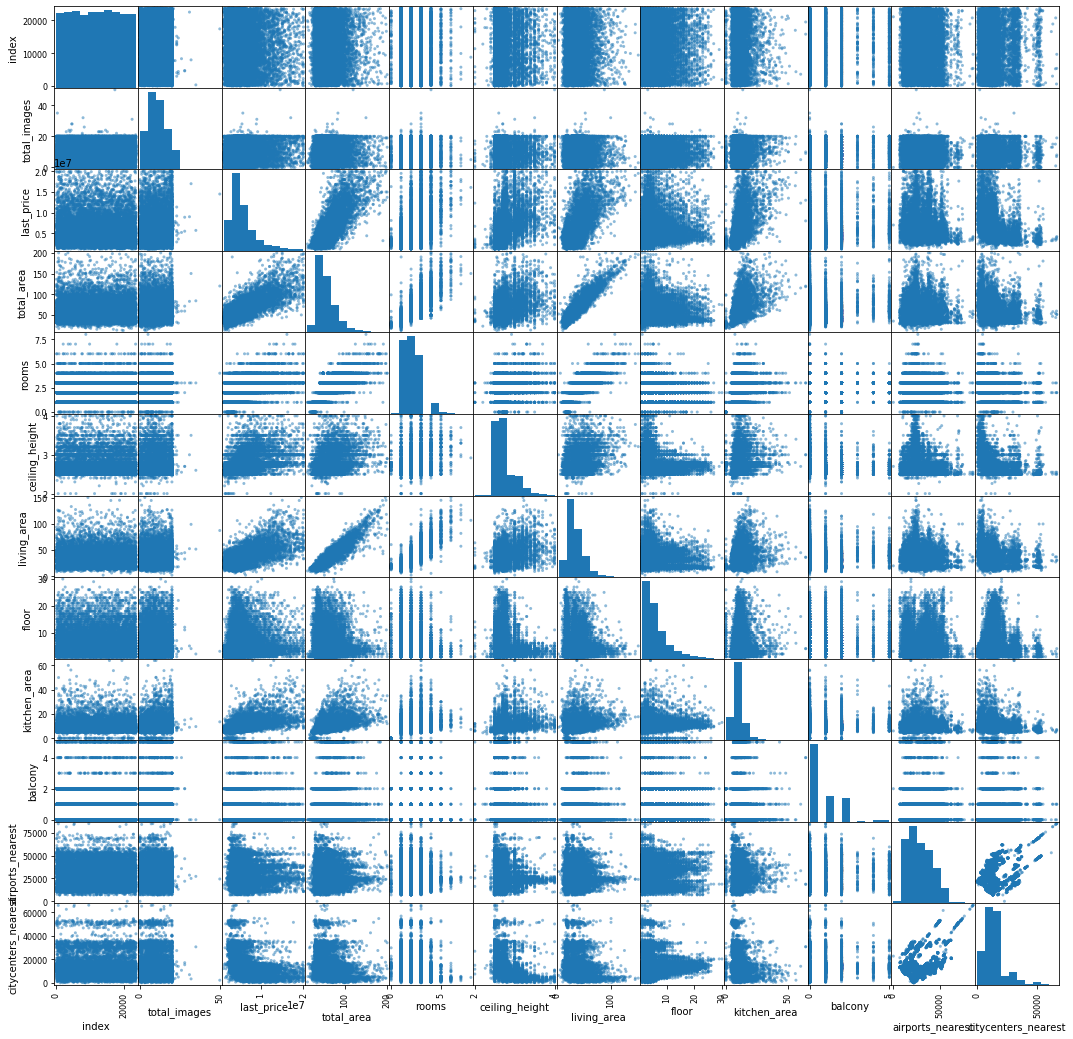

In [530]:
#stat_multi = good_data_df.pivot_table(index='id', values=['', '', ''])

pd.plotting.scatter_matrix(stat_table, figsize=(18,18))

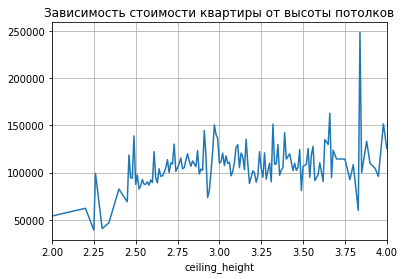

In [610]:
(
good_data_df.groupby('ceiling_height')['meter_price'].median()
    .plot(grid=True, title='Зависимость стоимости квартиры от высоты потолков')
)

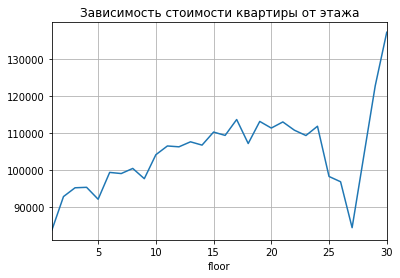

In [609]:
(
good_data_df.groupby('floor')['meter_price'].median()
    .plot(grid=True, title='Зависимость стоимости квартиры от этажа')
)

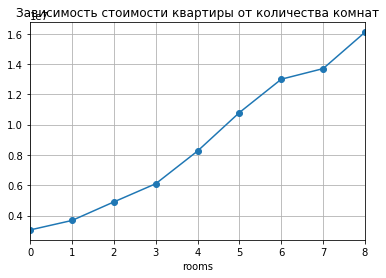

In [606]:
(
good_data_df.groupby('rooms')['last_price'].median()
    .plot(grid=True, style='o-', title='Зависимость стоимости квартиры от количества комнат')
)

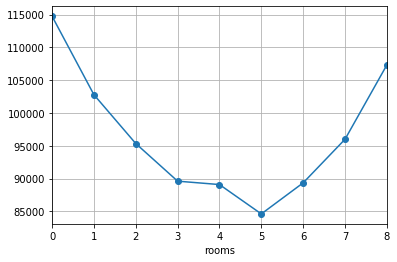

In [604]:
# Зависимость цены квартиры от количества комнат

good_data_df.groupby('rooms')['meter_price'].median().plot(grid=True, style='o-')

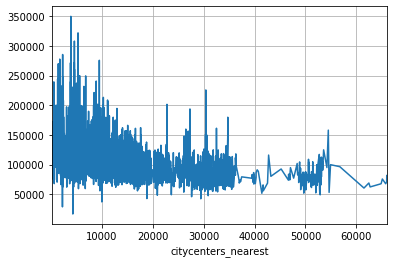

In [612]:
# Зависимость цены квартиры от удаленности от центра города

good_data_df.groupby('citycenters_nearest')['meter_price'].median().plot(grid=True)

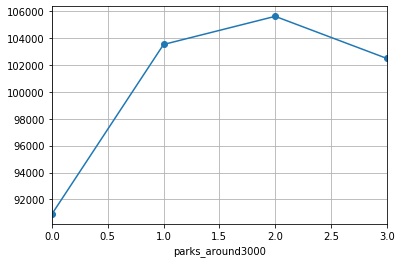

In [602]:
# Зависимость цены квартиры от количества парков в радиусе 3 км

good_data_df.groupby('parks_around3000')['meter_price'].median().plot(grid=True, style='o-')

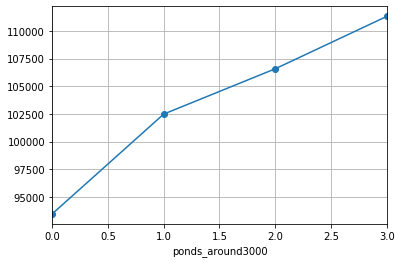

In [603]:
# Зависимость цены квартиры от количества прудов в радиусе 3 км

good_data_df.groupby('ponds_around3000')['meter_price'].median().plot(grid=True, style='o-')

Видим, что у стоимости жилья высокая корреляция с total_area: 0.78, living_area: 0.66, kitchen_area: 0.58, meter_price: 0.62, выше среднего корреляция с rooms: 0.50, ceiling_height: 0.50, умеренная корреляция с citycenters_nearest: -0.35, parks_around3000: 0.28, parks_nearest: -0.27, ponds_around3000: 0.26, ponds_nearest: -0.24

Итак, стоимость зависит от цены квадратного метра (meter_price), числа комнат (rooms)(от 0 до 5 комнат происходит снижение цены квартиры на фоне роста стоимости, далее происходит резкий рост цены), этажа первого или последнего (в среднем цена ниже на 10%), от удалённости от центра и от близости и количества прудов и парков. Нет зависимости от даты размещения: дня недели, месяца и года.

Выберем 10 населённых пунктов с наибольшим числом объявлений.

In [470]:
top_count_localities = df.groupby('locality_name')['meter_price'].count().sort_values(ascending=False).head(10)
top_count_localities

locality_name
Санкт-Петербург      15651
поселок Мурино         552
поселок Шушары         439
Всеволожск             398
Пушкин                 369
Колпино                338
поселок Парголово      327
Гатчина                307
деревня Кудрово        299
Выборг                 237
Name: meter_price, dtype: int64

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


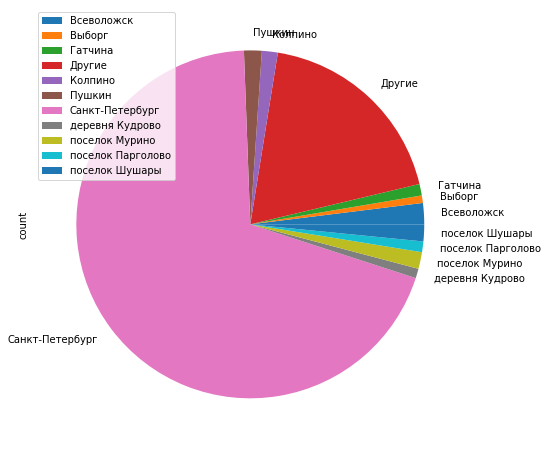

In [471]:
good_data_df['group_locality_names'] = (
    good_data_df['locality_name']
    .where(good_data_df['locality_name'].isin(top_count_localities.index), 'Другие')
)

stat_grouped = (
    good_data_df
    #.query('')
    .pivot_table(index='group_locality_names', values='meter_price', aggfunc=['median', 'count'])
)
stat_grouped.columns = ['meter_price', 'count']

stat_grouped.plot(y='count', kind='pie', figsize=(8,8))

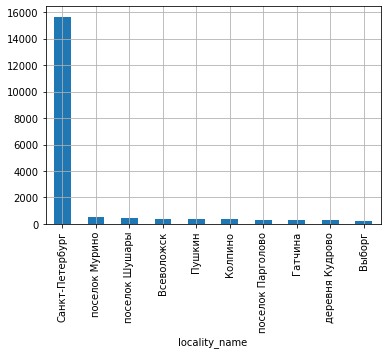

In [472]:
top_count_localities.plot(kind='bar', grid=True)

Посчитаем среднюю цену квадратного метра в этих населённых пунктах. Выделим населённые пункты с самой высокой и низкой стоимостью жилья.

In [473]:
(
good_data_df
    .query('locality_name in @top_count_localities.index')
    .groupby('locality_name')['meter_price']
    .mean()
    .sort_values(ascending=False)
)

locality_name
Санкт-Петербург      109410.209300
Пушкин               101744.361233
поселок Парголово     90900.927007
деревня Кудрово       90777.565574
поселок Мурино        87138.130841
поселок Шушары        79286.032407
Колпино               75938.098522
Гатчина               70629.503401
Всеволожск            67267.546125
Выборг                59221.656250
Name: meter_price, dtype: float64

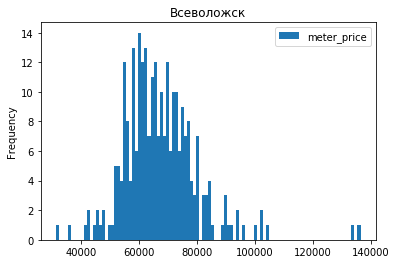

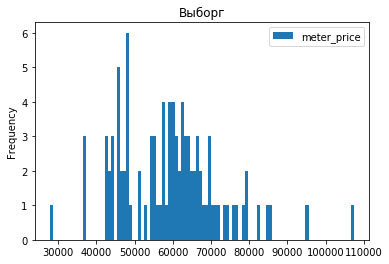

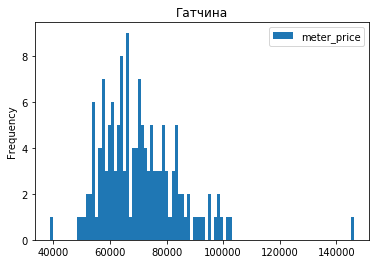

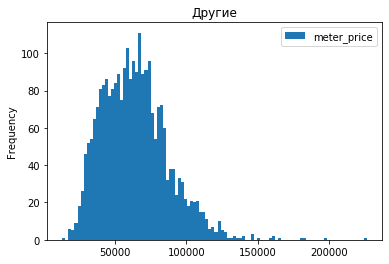

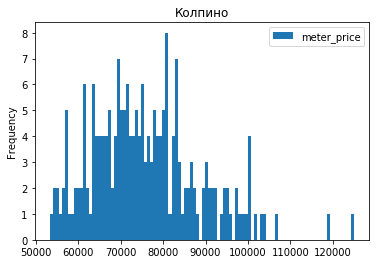

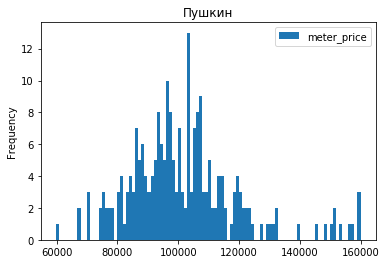

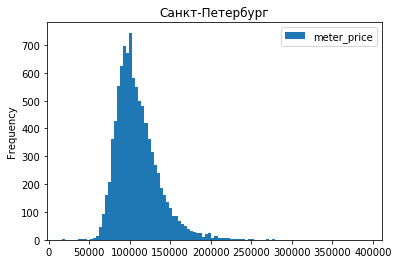

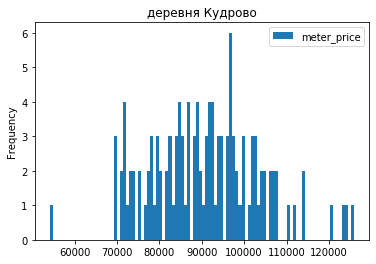

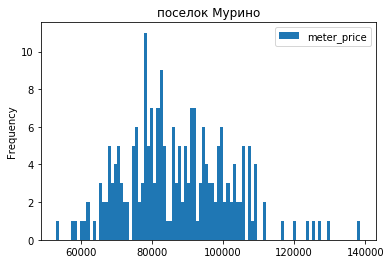

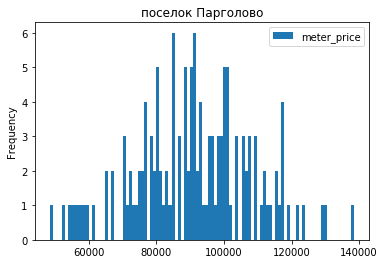

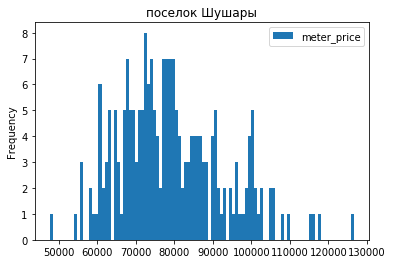

In [474]:
for locality_name, group_data in good_data_df.groupby('group_locality_names'):
    group_data.plot(y='meter_price', kind='hist', bins=100, title=locality_name)

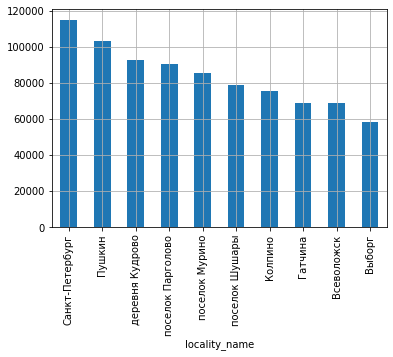

In [475]:
(
df
    .query('locality_name in @top_count_localities.index')
    .groupby('locality_name')['meter_price']
    .mean()
    .sort_values(ascending=False)
    .plot(kind='bar', grid=True)
)

Выделим квартиры в Санкт-Петербурге

In [476]:
spb_df = good_data_df.query('locality_name == "Санкт-Петербург"').reset_index()

In [477]:
# Создаем столбец с расстоянием до центра в километрах, округляем до целых значений

spb_df['citycenter_dist_km'] = (spb_df['citycenters_nearest'] / 1000).round()
spb_df[['citycenters_nearest', 'citycenter_dist_km']].head()

citycenters_nearest  citycenter_dist_km
0              16028.0                16.0
1               8098.0                 8.0
2              15008.0                15.0
3              13878.0                14.0
4              10698.0                11.0

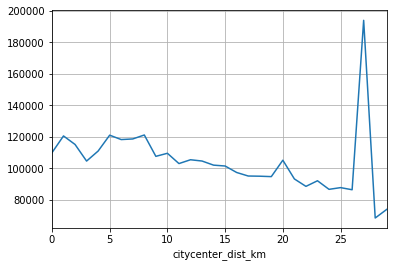

In [478]:
# Посчитаем среднюю цену для каждого километра. Построим график зависимости цены от удалённости от центра

spb_df.groupby('citycenter_dist_km')['meter_price'].median().plot(grid=True)

Видим, что график резко меняется на рубеже 8 км от центра, следовательно центральная зона Санкт-Петербурга находится в радиусе 8 км от центра

Выделим сегмент квартир в центре. Изучим распределения и выделим факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления).

In [479]:
spb_center_df = spb_df.query('citycenter_dist_km <= 8.0').reset_index()

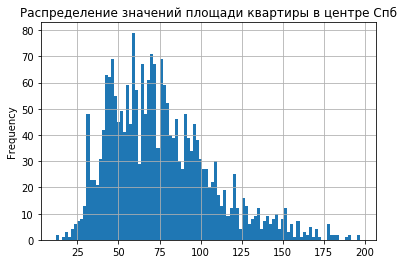

In [533]:
(
spb_center_df['total_area']
    .plot(kind='hist', bins=100, grid=True, title='Распределение значений площади квартиры в центре Спб')
)

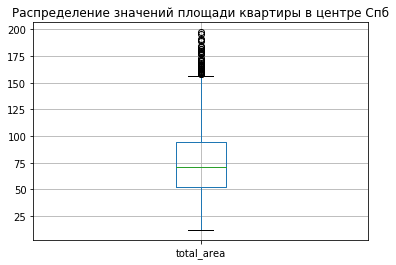

In [534]:
(
spb_center_df['total_area']
    .plot(kind='box', grid=True, title='Распределение значений площади квартиры в центре Спб')
)

In [559]:
spb_center_df['total_area'].describe()

count    2250.000000
mean       75.915520
std        31.281966
min        12.000000
25%        52.000000
50%        71.000000
75%        94.000000
max       197.200000
Name: total_area, dtype: float64

Площадь квартиры в центре Спб варьируется по распределению Пуссона в диапазоне от 12 до 197 кв.м и медианой 71 кв.м

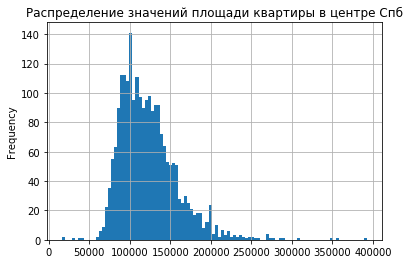

In [560]:
(
spb_center_df['meter_price']
    .plot(kind='hist', bins=100, grid=True, title='Распределение цен квартир в центре Спб')
)

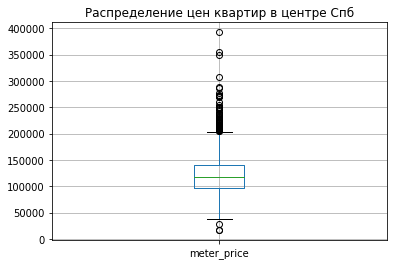

In [561]:
(
spb_center_df['meter_price']
    .plot(kind='box', grid=True, title='Распределение цен квартир в центре Спб')
)

In [562]:
spb_center_df['meter_price'].describe()

count      2250.000000
mean     122924.973333
std       35625.745403
min       16842.000000
25%       97366.000000
50%      117078.000000
75%      140480.750000
max      392354.000000
Name: meter_price, dtype: float64

Цена за 1 кв.м. квартиры в центре Спб варьируется  по распределению Пуссона в диапазоне от 17 т.р. до 390 т.р. и медианой 117 т.р.

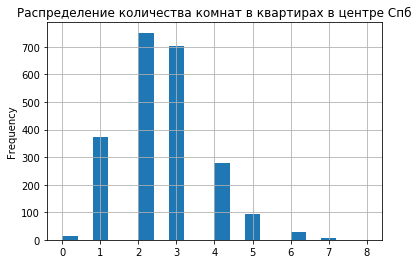

In [566]:
(
spb_center_df['rooms']
    .plot(kind='hist', bins=20, grid=True, title='Распределение количества комнат в квартирах в центре Спб')
)

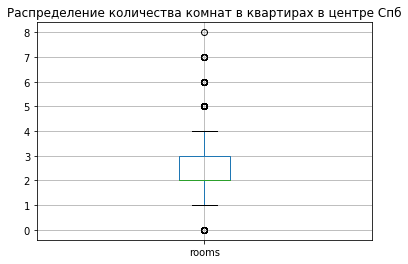

In [564]:
(
spb_center_df['rooms']
    .plot(kind='box', grid=True, title='Распределение количества комнат в квартирах в центре Спб')
)

In [563]:
spb_center_df['rooms'].describe()

count    2250.000000
mean        2.576444
std         1.158292
min         0.000000
25%         2.000000
50%         2.000000
75%         3.000000
max         8.000000
Name: rooms, dtype: float64

Число комнат квартиры в центре Спб варьируется по распределению Пуссона в диапазоне от 0 до 8 и медианой 2 комнаты. 2-3 комнаты - являются типичными значениями.

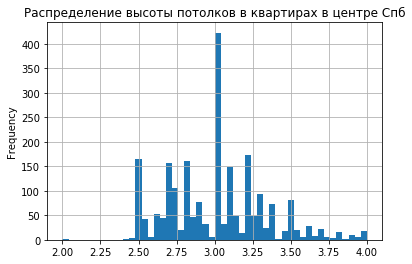

In [568]:
(
spb_center_df['ceiling_height']
    .plot(kind='hist', bins=50, grid=True, title='Распределение высоты потолков в квартирах в центре Спб')
)

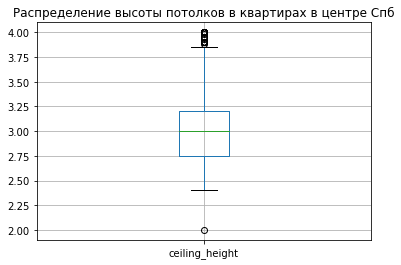

In [569]:
(
spb_center_df['ceiling_height']
    .plot(kind='box', grid=True, title='Распределение высоты потолков в квартирах в центре Спб')
)

In [570]:
spb_center_df['ceiling_height'].describe()

count    2250.000000
mean        3.009827
std         0.326127
min         2.000000
25%         2.750000
50%         3.000000
75%         3.200000
max         4.000000
Name: ceiling_height, dtype: float64

Высота потолков квартиры в центре Спб варьируется по распределению Пуссона в диапазоне от 2 до 4 м и медианой и средним 3 м.

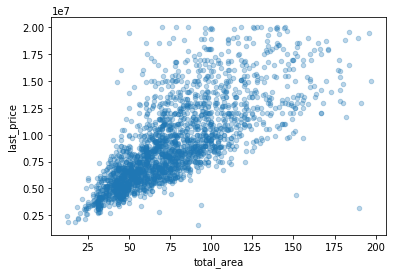

In [537]:
# Изучим следующие параметры: площадь, цена, число комнат, высота потолков.

spb_center_df.plot(kind='scatter', x='total_area', y='last_price', alpha=0.3)

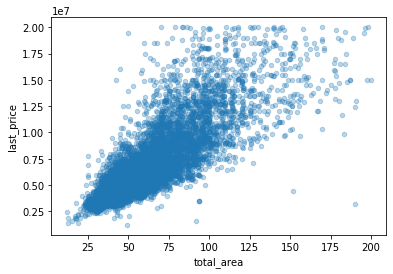

In [538]:
# Изучим следующие параметры: площадь, цена, число комнат, высота потолков.

spb_df.plot(kind='scatter', x='total_area', y='last_price', alpha=0.3)

In [539]:
spb_center_df['total_area'].corr(spb_center_df['last_price'])

0.7324759232544076

In [540]:
spb_df['total_area'].corr(spb_df['last_price'])

0.824325487773801

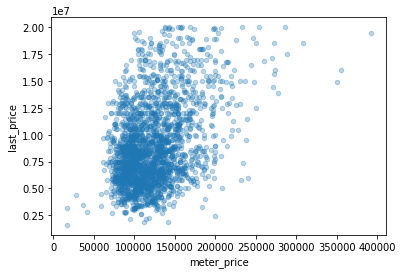

In [543]:
# Изучим следующие параметры: площадь, цена, число комнат, высота потолков.

spb_center_df.plot(kind='scatter', y='last_price', x='meter_price', alpha=0.3)

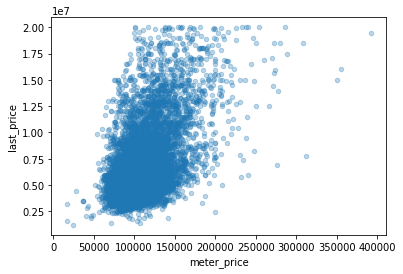

In [544]:
# Изучим следующие параметры: площадь, цена, число комнат, высота потолков.

spb_df.plot(kind='scatter', y='last_price', x='meter_price', alpha=0.3)

In [545]:
spb_center_df['last_price'].corr(spb_center_df['meter_price'])

0.39050708817859847

In [546]:
spb_df['last_price'].corr(spb_df['meter_price'])

0.507830657867303

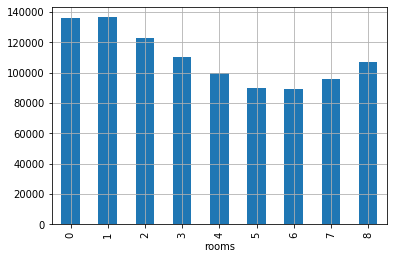

In [548]:
spb_center_df.groupby('rooms')['meter_price'].median().plot(kind='bar', grid=True)

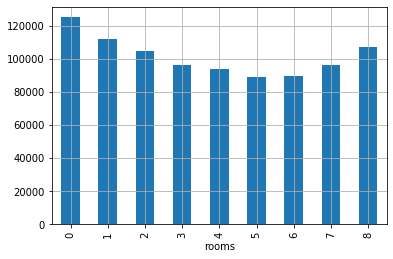

In [489]:
spb_df.groupby('rooms')['meter_price'].median().plot(kind='bar', grid=True)

In [490]:
spb_center_df['rooms'].corr(spb_center_df['meter_price'])

-0.3896149668417116

In [491]:
spb_df['rooms'].corr(spb_df['meter_price'])

-0.23097239033834074

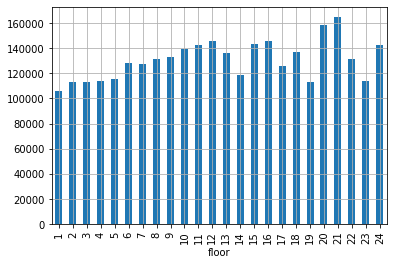

In [492]:
spb_center_df.groupby('floor')['meter_price'].median().plot(kind='bar', grid=True)

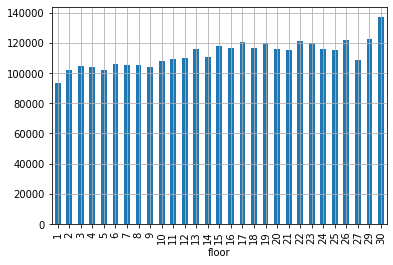

In [493]:
spb_df.groupby('floor')['meter_price'].median().plot(kind='bar', grid=True)

In [494]:
spb_center_df['floor'].corr(spb_center_df['meter_price'])

0.1678597122027191

In [495]:
spb_df['floor'].corr(spb_df['meter_price'])

0.14134010474917294

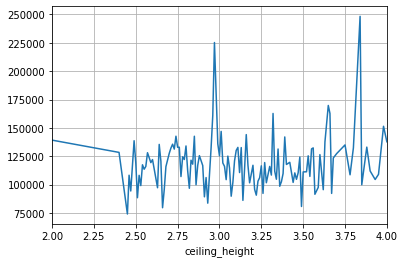

In [571]:
spb_center_df.groupby('ceiling_height')['meter_price'].mean().plot(grid=True)

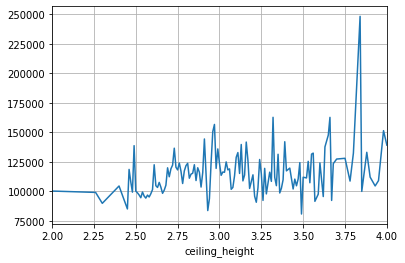

In [572]:
spb_df.groupby('ceiling_height')['meter_price'].mean().plot(grid=True)

In [498]:
spb_center_df['ceiling_height'].corr(spb_center_df['meter_price'])

-0.03536392685035446

In [499]:
spb_df['ceiling_height'].corr(spb_df['meter_price'])

0.2729105710618936

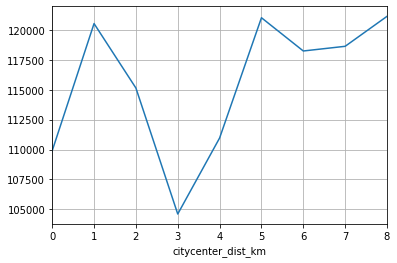

In [500]:
# Cредняя цена при удалении от центра для центральной зоны. 
# Падение цены на рубеже 3 км связано с близостью этого жилья к железнодорожным вокзалам

spb_center_df.groupby('citycenter_dist_km')['meter_price'].median().plot(grid=True)

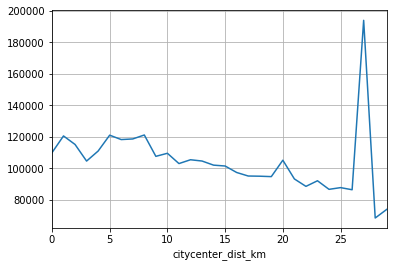

In [501]:
# Cредняя цена при удалении от центра во все городе.

spb_df.groupby('citycenter_dist_km')['meter_price'].median().plot(grid=True)

In [502]:
spb_center_df['citycenter_dist_km'].corr(spb_center_df['meter_price'])

0.005918024208474696

In [503]:
spb_df['citycenter_dist_km'].corr(spb_df['meter_price'])

-0.306959499886049

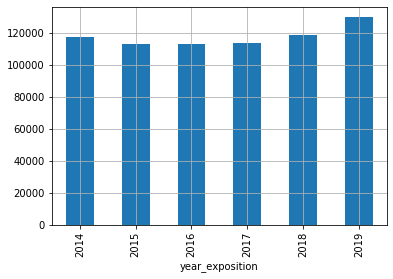

In [504]:
spb_center_df.groupby('year_exposition')['meter_price'].median().plot(kind='bar', grid=True)

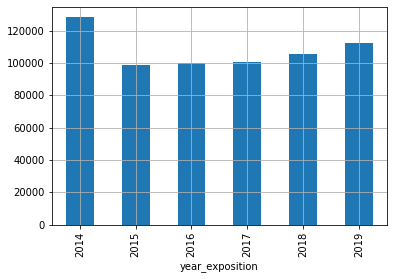

In [505]:
spb_df.groupby('year_exposition')['meter_price'].median().plot(kind='bar', grid=True)

In [506]:
spb_center_df['year_exposition'].corr(spb_center_df['meter_price'])

0.0926660575552463

In [507]:
spb_df['year_exposition'].corr(spb_df['meter_price'])

0.10927869592285526

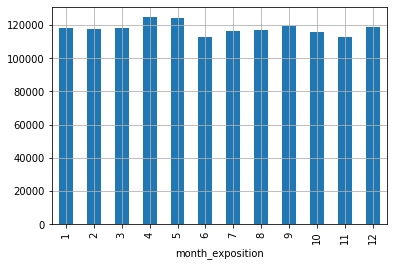

In [508]:
spb_center_df.groupby('month_exposition')['meter_price'].median().plot(kind='bar', grid=True)

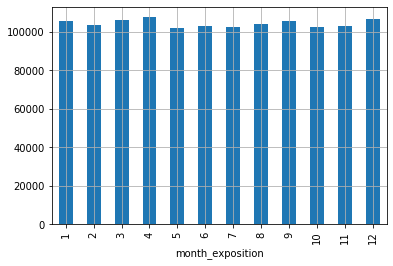

In [509]:
spb_df.groupby('month_exposition')['meter_price'].median().plot(kind='bar', grid=True)

In [510]:
spb_center_df['month_exposition'].corr(spb_center_df['meter_price'])

-0.012399446782670019

In [511]:
spb_df['month_exposition'].corr(spb_df['meter_price'])

-0.017650930192791493

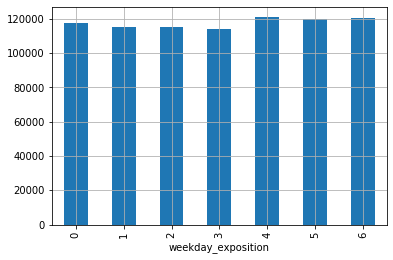

In [512]:
spb_center_df.groupby('weekday_exposition')['meter_price'].median().plot(kind='bar', grid=True)

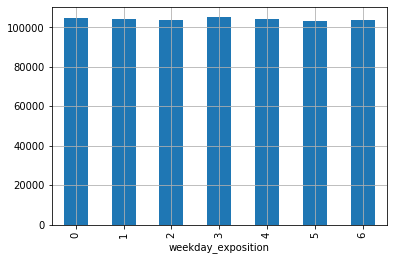

In [513]:
spb_df.groupby('weekday_exposition')['meter_price'].median().plot(kind='bar', grid=True)

In [514]:
spb_center_df['weekday_exposition'].corr(spb_center_df['meter_price'])

0.026239124987540784

In [515]:
spb_df['weekday_exposition'].corr(spb_df['meter_price'])

-0.0035013178448222537

In [516]:
# Разобъем временной ряд на двухнедельные интервалы

spb_df['first_2weeks_exposition'] = spb_df['first_day_exposition'].dt.round('14D')

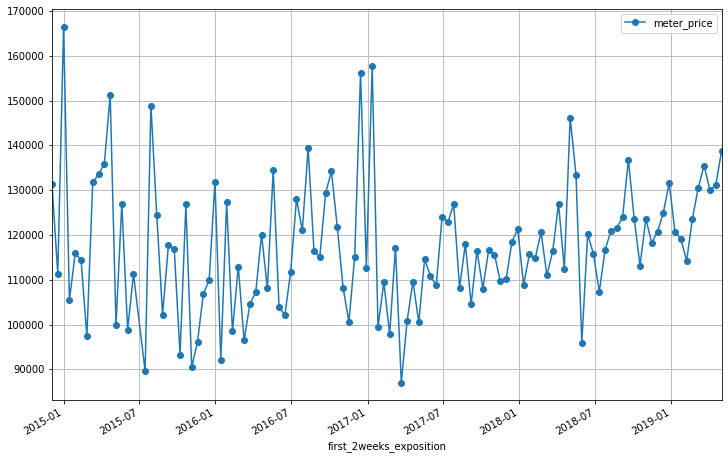

In [558]:
(
spb_df
    .query('citycenter_dist_km <= 8.0')
    .pivot_table(index='first_2weeks_exposition', values='meter_price', aggfunc='median')
    .plot(style='o-', grid=True, figsize=(12,8))
)

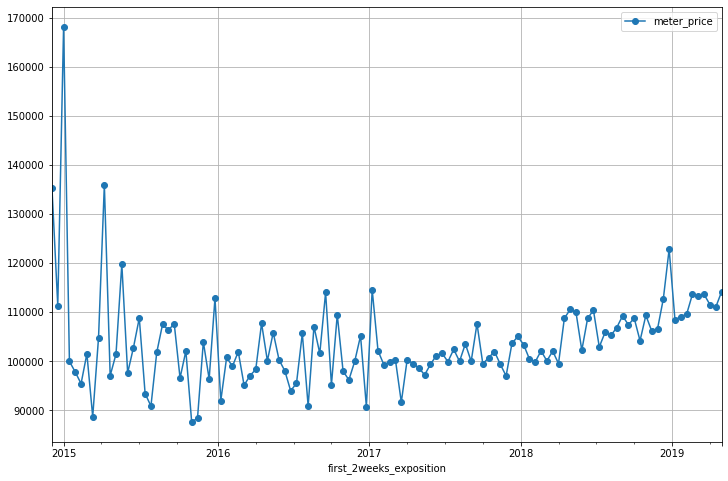

In [557]:
(
spb_df
    .pivot_table(index='first_2weeks_exposition', values='meter_price', aggfunc='median')
    .plot(style='o-', grid=True, figsize=(12,8))
)

### Вывод

* Изучено время продажи квартиры. Посчитаны средняя и медиана. Выявлено, что продажа обычно занимает от 30 до 600 дней. Поэтому, если дней меньше 30 - можно считать, что продажи прошли очень быстро, а когда болшее 600 дней - необычно долго.
* Убрали редкие и выбивающиеся значения: высота потолков от 2 до 4 м, число комнат от 0 до 8, стоимость от 1,2 млн. до 20 млн. руб., общая площадь от 12 до 200 кв.м Средние и медианы практически сравнялись. Количество этажей в центре меньше из-за малоэтажной застройки.
* Выявлено, что больше всего влияют следующие факторы: цена квадратного метра (meter_price), число комнат (rooms), этаж первый или последний (в среднем цена ниже на 10%), умеренно: удалённость от центра и слабо: близость и количество прудов и парков. Нет зависимости от даты размещения: дня недели, месяца. Только от года к года стоимость жилья неуклонно растет примерно на 10000 руб. за 1 кв.м ежегодно.
* Выбераны 10 населённых пунктов с наибольшим числом объявлений. Посчитаны средняя цена квадратного метра в этих населённых пунктах. Выделены населённые пункты с самой высокой и низкой стоимостью жилья.
* Выяснено, что область радиусом 8 км входит в центр Санкт-Петербурга. Посчитана средняя цена для каждого километра от центра. Построен график, показывающий зависимость цены от удалённости от центра. Определена граница, где график сильно меняется и на основании этого найдена центральная зона.
* Выделен сегмент квартир в центре и изучены следующие параметры: площадь, цена, число комнат, высота потолков. Выделены факторы, которые влияют на стоимость квартиры: 
1. Число комнат - цена падает с увеличенем числа комнат, в центре в 2 раза заметнее, чем по всему городу. Умеренная корреляция.
2. Этаж - цена растет с увеличением этажа, одиннаково и в центре и во всем городе. Слабая корреляция.
3. Высота потолков - цена увеличивается с увеличенем высоты потолков в масштабах всего города, в центре такой зависимости нет.
4. Удалённость от центра - в масштабах города видно умеренное устойчивое падение цены при удалении от центра, в центре цена резко проваливается в районе 3 км от центра и вырастает до еще больших значений в к границе зоны. В Питере это связано с ветхостью и малым количеством новостроя в зоне до 3 км, и его увеличением в дальнейшем
5. Дата размещения объявления - во всем городе видно увеличение цены (примерно на 10000 руб. за 1 кв.м ежегодно), в центре примерно та же ситуации, и большая волатильность.



## Общий вывод

Итак, был обработан массив данных рынка объектов жилой недвижимости Петербурга и Ленинградской области в период с декабря 2014 по май 2019 гг. Там, где это возможно, были заполенены пропуски. Там где, пропуски в данных носили совершенно случайный характер и их было сравнительно немного, а влияние таких факторов велико, лучшим выходом стало удаление. 
Научились определять рыночную стоимость объектов недвижимости. Влияние незаполненных данных сведено к минимуму. Неявные дубликаты в локациях объектов были выявлены путем лемматизации и заменены через выборочнуюй коррекцию. По каждому параметру данных построены гистограммы распределения и выявлены их особенности.

По обработанным данным проведено исследование по выявлению факторов влияния на стоимость квартир в целом по региону и в частности для Петербурга.